In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
import warnings
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [3]:
pd.set_option('display.max_columns', None)

# Load the dataset
data = pd.read_csv(f"D:/MasterThesisCA/New Dataset2/creditcard_final_datasetv2.csv")
bold('**Shape of our train and test data**')
print('Dimension of train:',data.shape) 
data.head()

**Shape of our train and test data**

Dimension of train: (975036, 22)


,trans_date_trans_time,credit_card_number,merchant,category,amount,first_name,last_name,gender,street,city,state,zip_code,latitude,longitude,city_population,job,day_of_birth,trans_number,unix_time,merchant_lat,merchant_long,fraud
0,2/1/2021 0:02,4.750000e+12,fraud_Kling-Grant,grocery_net,19.46,Carrie,Washington,F,6114 Adams Harbor Suite 096,Kingsford Heights,IN,46346,41.4802,-86.6919,1423,"Psychologist, forensic",10/7/1998,0442179ed2d64942bc45c5442c3d5895,1328054544,41.587290,-87.582956,0
1,2/1/2021 0:03,4.330000e+15,fraud_Huel-Langworth,misc_net,13.01,Scott,Martin,M,7483 Navarro Flats,Freedom,WY,83120,43.0172,-111.0292,471,"Education officer, museum",8/2/1967,ef5b8cbad64ceecb8d1b81960a49b467,1328054607,42.032369,-111.700448,0
2,2/1/2021 0:05,4.720000e+18,"fraud_Streich, Hansen and Veum",gas_transport,50.02,Robert,Drake,M,463 Willie Estates,Burbank,OK,74633,36.6966,-96.7869,471,Sub,3/30/1941,eae42972de9670a3d907035c0594d494,1328054744,36.413203,-95.986495,0
3,2/1/2021 0:06,1.800000e+14,fraud_Johns Inc,entertainment,6.11,Jared,Camacho,M,4257 Perez Mall,Canton,OH,44702,40.8027,-81.3739,192805,Building control surveyor,6/30/1963,2832eb7d75a6f04468c3e52b03103090,1328054781,40.576060,-81.529672,0
4,2/1/2021 0:08,4.540000e+18,fraud_Spinka Inc,grocery_net,32.14,Nathan,Mendoza,M,767 Adam Mill Apt. 115,Espanola,NM,87533,35.9866,-106.0654,18408,Historic buildings inspector/conservation officer,7/18/1972,345575e8bebaaed20c5ded6694383a3a,1328054900,35.125220,-105.981956,0


Trans_date_trans_time: Date and time of the transaction.
Credit_card_number: Credit card number used for the transaction.
Merchant: Name of the merchant.
Category: Category of the transaction (e.g., grocery_net, misc_net, gas_transport, entertainment).
Amount: Transaction amount.
First_name, Last_name: First and last name of the cardholder.
Gender: Gender of the cardholder.
Street, City, State, Zip: Address details.
Latitude, Longitude: Geographic coordinates.
City_population: Population of the city.
Job: Job title of the cardholder.
Day_of_birth: Birthdate of the cardholder.
Trans_number: A unique identifier for the transaction.
Unix_time: Time of the transaction in Unix time format.
Merchant_lat, Merchant_long: Geographic coordinates of the merchant.
Fraud: Indicates whether the transaction was fraudulent (1) or not (0).


In [4]:
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

In [5]:
description(data)

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,trans_date_trans_time,object,0,437161,2/1/2021 0:02,2/1/2021 0:03,2/1/2021 0:05
1,credit_card_number,float64,0,320,4750000000000.0,4330000000000000.0,4720000000000000000.0
2,merchant,object,0,693,fraud_Kling-Grant,fraud_Huel-Langworth,"fraud_Streich, Hansen and Veum"
3,category,object,0,14,grocery_net,misc_net,gas_transport
4,amount,float64,0,47121,19.46,13.01,50.02
5,first_name,object,0,346,Carrie,Scott,Robert
6,last_name,object,0,478,Washington,Martin,Drake
7,gender,object,0,2,F,M,M
8,street,object,0,960,6114 Adams Harbor Suite 096,7483 Navarro Flats,463 Willie Estates
9,city,object,0,876,Kingsford Heights,Freedom,Burbank


In [6]:
data.describe()

,credit_card_number,amount,zip_code,latitude,longitude,city_population,unix_time,merchant_lat,merchant_long,fraud
count,9.750360e+05,975036.000000,975036.000000,975036.000000,975036.000000,9.750360e+05,9.750360e+05,975036.000000,975036.000000,975036.000000
mean,4.171978e+17,70.213255,48815.857405,38.534111,-90.231395,8.904288e+04,1.345505e+09,38.534049,-90.231559,0.005551
std,1.308903e+18,160.831716,26893.862150,5.076803,13.754579,3.025941e+05,9.320993e+06,5.111292,13.766833,0.074295
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.328055e+09,19.027785,-166.671242,0.000000
25%,1.800000e+14,9.640000,26237.000000,34.620500,-96.798000,7.430000e+02,1.337961e+09,34.730153,-96.900836,0.000000
50%,3.520000e+15,47.420000,48174.000000,39.354300,-87.476900,2.456000e+03,1.345381e+09,39.364304,-87.448250,0.000000
75%,4.640000e+15,83.010000,72042.000000,41.940400,-80.158000,2.032800e+04,1.354320e+09,41.958414,-80.239186,0.000000
max,4.990000e+18,28948.900000,99783.000000,66.693300,-67.950300,2.906700e+06,1.362182e+09,67.510267,-66.950902,1.000000


In [7]:


def crosstab(cat, cat_target, color):
    '''cat = categorical variable, cat_target = our target categorical variable.'''
    global ax1
    fig_size = (28, 6)
    title_size = 18
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = cat, columns = cat_target)
    pct_cat_grouped_by_cat_target = round(pd.crosstab(index = cat, columns = cat_target, normalize = 'index')*100, 2)
    
    # Plot relative frequrncy of target by a categorical variable
    ax1 = pct_cat_grouped_by_cat_target.plot.bar(color = color, title = 'Percentage Count of target by %s' %cat.name, figsize = fig_size)
    ax1.title.set_size(fontsize = title_size)
    pct_bar_labels()
    plt.xlabel(cat.name, fontsize = font_size)
    plt.show()



## For the purpose where we need ascending order of the absolute/relative frequency of Feature on X Axis

In [8]:
def crosstab1(cat, cat_target, color):
    '''cat = categorical variable, cat_target = our target categorical variable.'''
    global ax1
    fig_size = (15, 6)
    title_size = 18
    font_size = 6
    cat_grouped_by_cat_target = pd.crosstab(index = cat, columns = cat_target)
    pct_cat_grouped_by_cat_target = round(pd.crosstab(index = cat, columns = cat_target, normalize = 'index')*100, 2)
    
    # Plot relative frequrncy of target by a categorical variable
    ax1 = pct_cat_grouped_by_cat_target.plot.bar(color = color, title = 'Percentage Count of Gender by Fraud (0 or 1)', figsize = fig_size)
    ax1.title.set_size(fontsize = title_size)
    pct_bar_labels()
    plt.xlabel(cat.name, fontsize = font_size)
    plt.show()


In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Function for displaying bar labels in absolute scale
def abs_bar_labels():
    font_size = 10
    plt.ylabel('Absolute Frequency', fontsize=font_size)
    plt.xticks(rotation=0, fontsize=font_size)
    plt.yticks([])

    for x in ax.patches:
        ax.annotate(format(x.get_height(), '.0f'), 
                    (x.get_x() + x.get_width() / 2., x.get_height()), 
                    ha='center', va='center', xytext=(0, 7), 
                    textcoords='offset points', fontsize=font_size, color='black')

# Function for displaying bar labels in relative scale
def pct_bar_labels():
    font_size = 10
    plt.ylabel('Relative Frequency (%)', fontsize=font_size)
    plt.xticks(rotation=0, fontsize=font_size)
    plt.yticks([])

    for x in ax1.patches:
        ax1.annotate(format(x.get_height(), '.2f') + '%', 
                     (x.get_x() + x.get_width() / 2., x.get_height()), 
                     ha='center', va='center', xytext=(0, 7), 
                     textcoords='offset points', fontsize=font_size, color='black')

# Function to create a dataframe of absolute and relative frequency of each variable and plot them
def absolute_and_relative_freq(variable):
    global ax, ax1

    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts()
    relative_frequency = round(variable.value_counts(normalize=True) * 100, 2)

    df = pd.DataFrame({'Absolute Frequency': absolute_frequency, 'Relative Frequency(%)': relative_frequency})
    print('Absolute & Relative Frequency of', variable.name, ':')
    display(df)

    # Define a color palette
    colors = plt.cm.rainbow(np.linspace(0, 1, len(absolute_frequency)))

    # Plot for absolute frequency
    fig, ax = plt.subplots(figsize=(18, 5))
    absolute_frequency.plot.bar(ax=ax, color=colors)
    ax.set_title('Absolute Frequency of %s' % variable.name, fontsize=18)
    abs_bar_labels()
    plt.show()

    # Plot for relative frequency
    fig, ax1 = plt.subplots(figsize=(18, 5))
    relative_frequency.plot.bar(ax=ax1, color=colors)
    ax1.set_title('Relative Frequency of %s' % variable.name, fontsize=18)
    pct_bar_labels()
    plt.show()


## For the purpose where we need ascending order of the feature of X Axis

In [10]:

def absolute_and_relative_freq1(variable):
    global ax, ax1

    # Sort the variable's unique values to ensure the bars are in the correct order
    sorted_unique_values = sorted(variable.unique())
    
    # Dataframe of absolute and relative frequency, reindexed and sorted by the variable's values
    absolute_frequency = variable.value_counts().reindex(sorted_unique_values).fillna(0)
    relative_frequency = round(absolute_frequency / absolute_frequency.sum() * 100, 2)

    df = pd.DataFrame({'Absolute Frequency': absolute_frequency, 'Relative Frequency(%)': relative_frequency})
    print('Absolute & Relative Frequency of', variable.name, ':')
    display(df)

    # Define a color palette
    colors = plt.cm.rainbow(np.linspace(0, 1, len(sorted_unique_values)))

    # Plot for absolute frequency
    fig, ax = plt.subplots(figsize=(18, 5))
    ax.bar(sorted_unique_values, absolute_frequency, color=colors)
    ax.set_title('Absolute Frequency of %s' % variable.name, fontsize=18)
    ax.set_xticks(sorted_unique_values)  # Set x-ticks to be the sorted unique values of the variable
    ax.set_xticklabels(sorted_unique_values, rotation=0, fontsize=8)
    abs_bar_labels()
    plt.show()

    # Plot for relative frequency
    fig, ax1 = plt.subplots(figsize=(18, 5))
    ax1.bar(sorted_unique_values, relative_frequency, color=colors)
    ax1.set_title('Relative Frequency of %s' % variable.name, fontsize=18)
    ax1.set_xticks(sorted_unique_values)  # Set x-ticks to be the sorted unique values of the variable
    ax1.set_xticklabels(sorted_unique_values, rotation=0, fontsize=8)
    pct_bar_labels()
    plt.show()

### Feature1 : 'trans_date_trans_time'

In [11]:
print("Unique Values: ", data['trans_date_trans_time'].nunique()) # To check unique counts
print(data['trans_date_trans_time'].describe())
print(data['trans_date_trans_time'].value_counts())

Unique Values:  437161
count              975036
unique             437161
top       12/1/2021 19:27
freq                   17
Name: trans_date_trans_time, dtype: object
trans_date_trans_time
12/1/2021 19:27     17
12/1/2021 17:06     15
12/23/2021 16:14    15
12/22/2021 20:43    15
12/21/2021 13:41    15
                    ..
8/8/2021 11:31       1
8/8/2021 11:32       1
8/8/2021 11:33       1
8/8/2021 11:34       1
8/15/2021 13:10      1
Name: count, Length: 437161, dtype: int64


In [12]:
# Convert 'trans_date_trans_time' to datetime and extract 'transaction_hour'
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

##### This is the date-time of Transaction, we need to extract something from it for Feature Engineering

### Feature 2: credit_card_number

In [13]:
print("Unique Values: ",data['credit_card_number'].nunique()) # Unique values
print(data['credit_card_number'].describe())
print(data['credit_card_number'].value_counts())

Unique Values:  320
count    9.750360e+05
mean     4.171978e+17
std      1.308903e+18
min      6.041621e+10
25%      1.800000e+14
50%      3.520000e+15
75%      4.640000e+15
max      4.990000e+18
Name: credit_card_number, dtype: float64
credit_card_number
6.010000e+15    47707
2.130000e+14    39152
1.800000e+14    30134
3.560000e+15    20876
3.530000e+15    20807
                ...  
5.300000e+15       11
5.140000e+15       10
4.840000e+12       10
4.160000e+18       10
6.580000e+15        7
Name: count, Length: 320, dtype: int64


### Feature 3: Merchant

In [14]:
print("Unique Values: ",data['merchant'].nunique()) # Unique values
print(data['merchant'].describe())
print(data['merchant'].value_counts())

Unique Values:  693
count                975036
unique                  693
top       fraud_Kilback LLC
freq                   3277
Name: merchant, dtype: object
merchant
fraud_Kilback LLC                       3277
fraud_Cormier LLC                       2756
fraud_Schumm PLC                        2725
fraud_Boyer PLC                         2625
fraud_Kuhn LLC                          2623
                                        ... 
fraud_Treutel-King                       585
fraud_Medhurst, Labadie and Gottlieb     574
fraud_Reichert-Weissnat                  574
fraud_Satterfield-Lowe                   572
fraud_Hahn, Douglas and Schowalter       556
Name: count, Length: 693, dtype: int64


In [15]:
# Mean Encoding for the 'merchant' column
merchant_mean = data.groupby('merchant')['fraud'].mean()
data['merchant_mean_enc'] = data['merchant'].map(merchant_mean)

In [16]:
data['merchant_mean_enc'].value_counts()

merchant_mean_enc
0.000000    35720
0.002147     5588
0.004014     3986
0.001601     3748
0.006087     3614
            ...  
0.005119      586
0.003413      586
0.003484      574
0.003497      572
0.001799      556
Name: count, Length: 621, dtype: int64

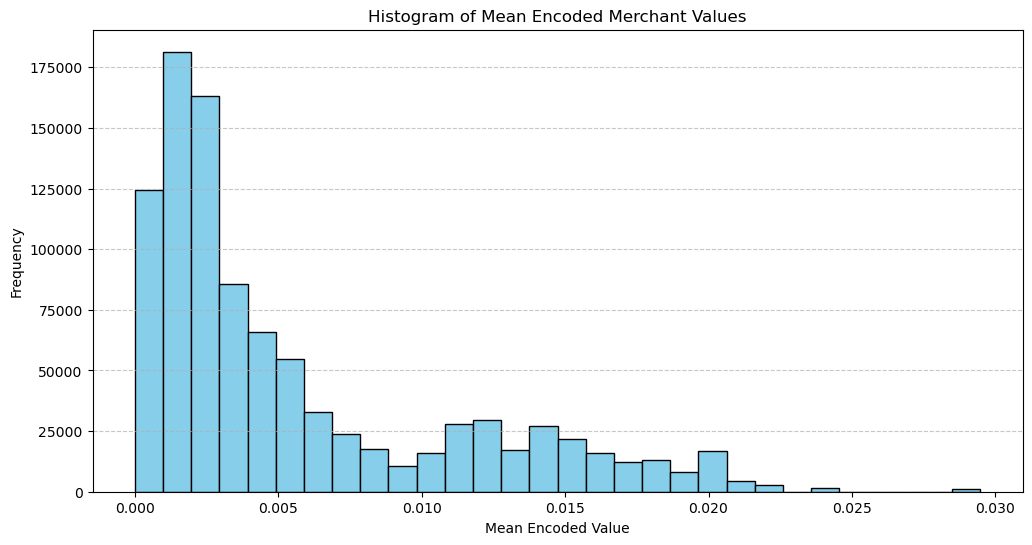

In [17]:
plt.figure(figsize=(12, 6))
hist_plot= plt.hist(data['merchant_mean_enc'], bins=30, edgecolor='black', color='skyblue')
plt.title('Histogram of Mean Encoded Merchant Values')
plt.xlabel('Mean Encoded Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Feature 4: Category

In [18]:
print("Unique Values: ",data['category'].nunique()) # Unique values
print(data['category'].describe())

Unique Values:  14
count            975036
unique               14
top       gas_transport
freq              98954
Name: category, dtype: object


Absolute & Relative Frequency of category :


,Absolute Frequency,Relative Frequency(%)
category,,
gas_transport,98954,10.15
grocery_pos,92843,9.52
home,92579,9.49
shopping_pos,87804,9.01
kids_pets,85047,8.72
shopping_net,73261,7.51
entertainment,70741,7.26
food_dining,68884,7.06
personal_care,68354,7.01


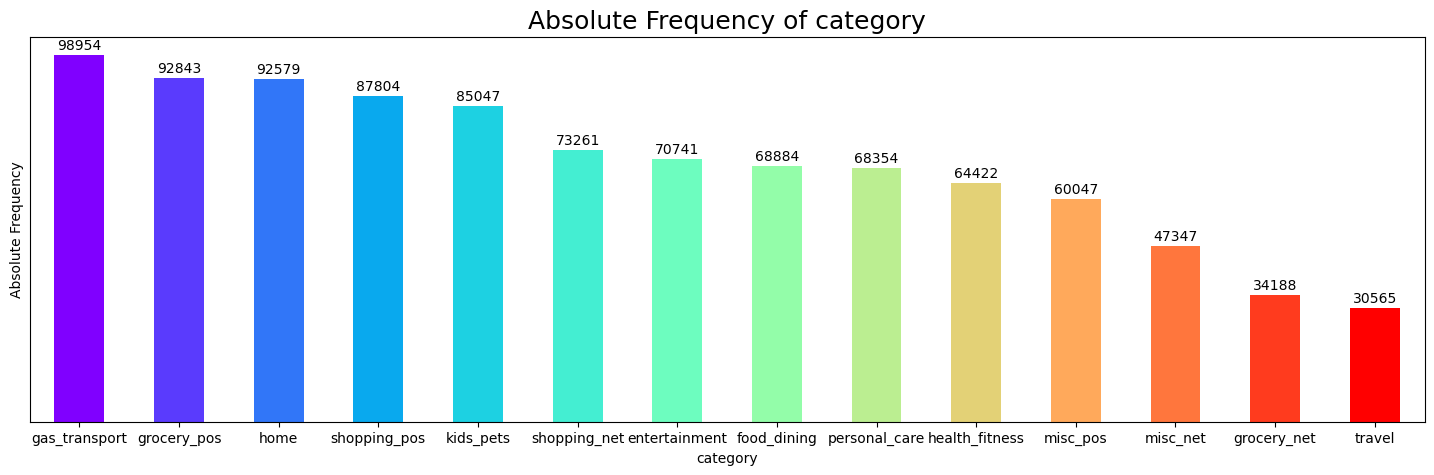

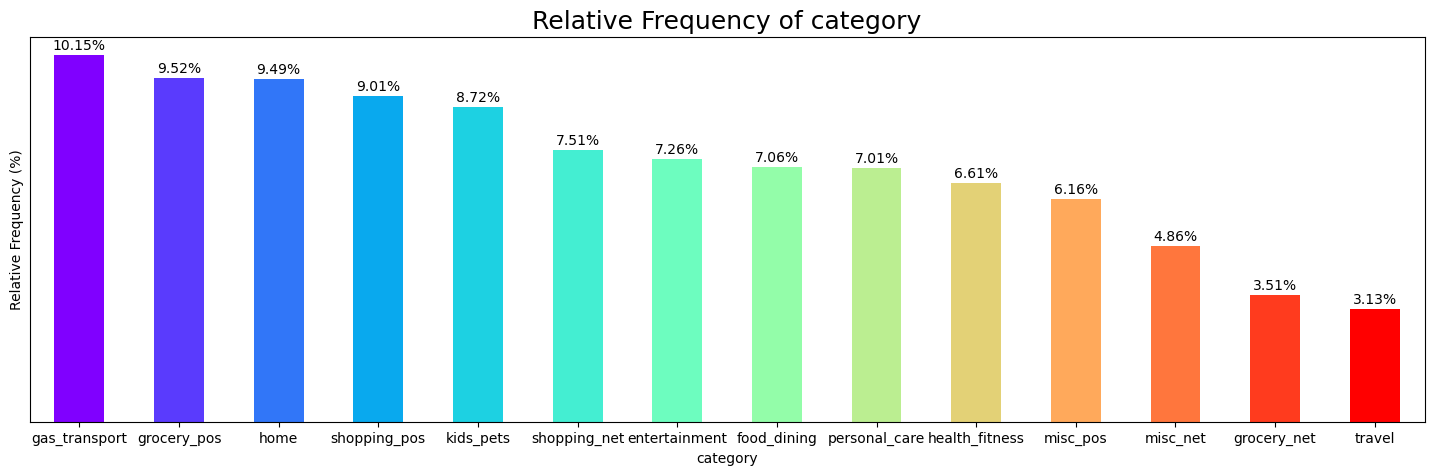

In [19]:

absolute_and_relative_freq(data.category)

**Percentage Count of Category by fraud(0 or 1):**

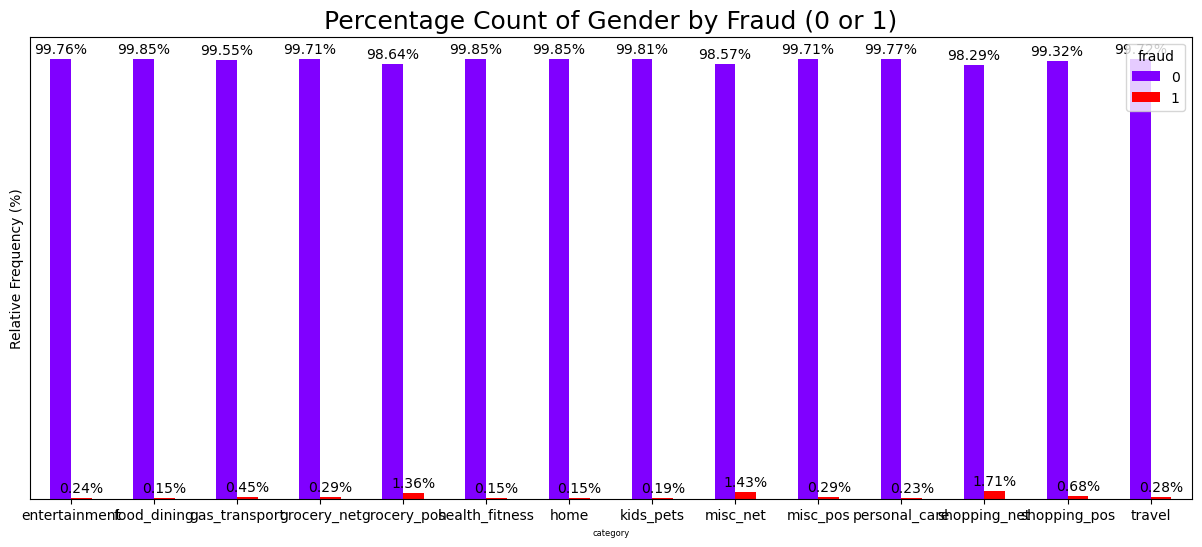

In [20]:
bold('**Percentage Count of Category by fraud(0 or 1):**')
sorted_unique_values = sorted(data.fraud.unique())
absolute_frequency = data.fraud.value_counts()
color = plt.cm.rainbow(np.linspace(0, 1, len(sorted_unique_values)))
crosstab1(data.category, data.fraud, color)

## Apply One hot encoding for this

In [21]:
# One-Hot Encoding for categorical variables 'category' and 'merchant'
categorical_cols = ['category']
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_encoded = one_hot_encoder.fit_transform(data[['category']])
category_encoded_df = pd.DataFrame(category_encoded, columns=one_hot_encoder.get_feature_names_out(['category']))
data = pd.concat([data, category_encoded_df], axis=1)

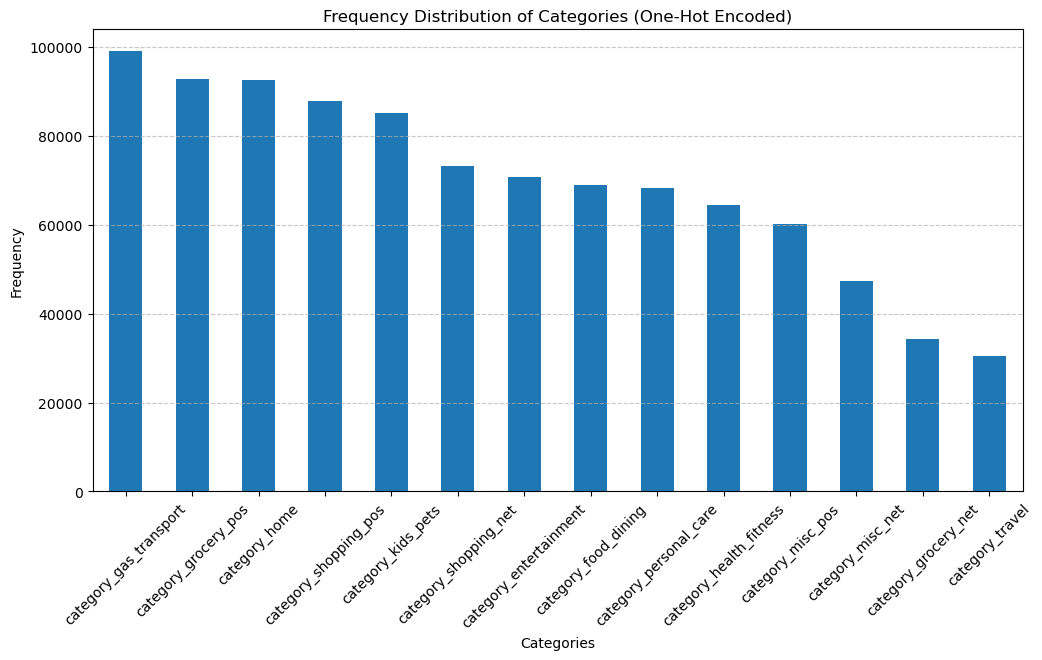

In [22]:
plt.figure(figsize=(12, 6))
category_encoded_summary = category_encoded_df.sum().sort_values(ascending=False)
category_encoded_summary.plot(kind='bar')
plt.title('Frequency Distribution of Categories (One-Hot Encoded)')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
description(category_encoded_df)

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,category_entertainment,float64,0,2,0.0,0.0,0.0
1,category_food_dining,float64,0,2,0.0,0.0,0.0
2,category_gas_transport,float64,0,2,0.0,0.0,1.0
3,category_grocery_net,float64,0,2,1.0,0.0,0.0
4,category_grocery_pos,float64,0,2,0.0,0.0,0.0
5,category_health_fitness,float64,0,2,0.0,0.0,0.0
6,category_home,float64,0,2,0.0,0.0,0.0
7,category_kids_pets,float64,0,2,0.0,0.0,0.0
8,category_misc_net,float64,0,2,0.0,1.0,0.0
9,category_misc_pos,float64,0,2,0.0,0.0,0.0


### Feature 5: Amount

In [24]:
print("Unique Values: ",data['amount'].nunique()) # Unique values
print(data['amount'].describe())
print(data['amount'].value_counts())

Unique Values:  47121
count    975036.000000
mean         70.213255
std         160.831716
min           1.000000
25%           9.640000
50%          47.420000
75%          83.010000
max       28948.900000
Name: amount, dtype: float64
amount
1.04       419
1.02       409
1.14       403
1.01       401
1.25       399
          ... 
374.46       1
417.01       1
324.16       1
1466.68      1
702.33       1
Name: count, Length: 47121, dtype: int64


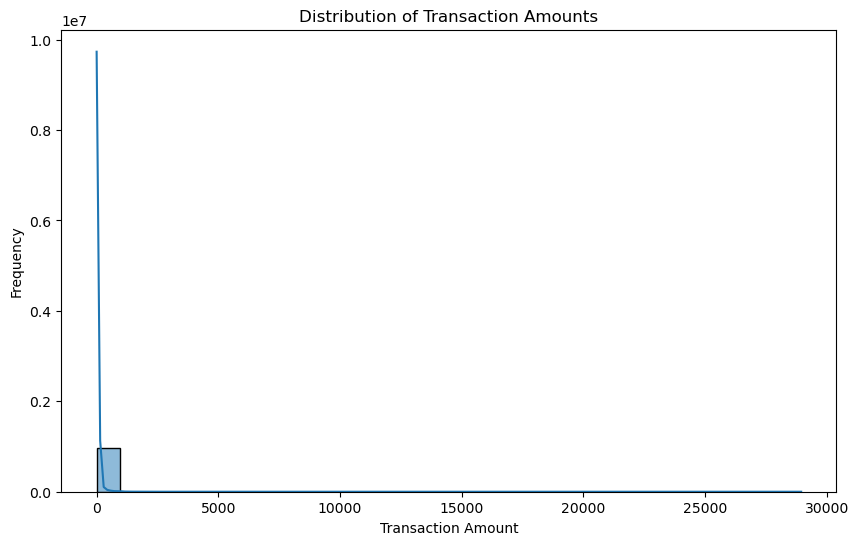

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], kde=True, bins = 30)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Probability')

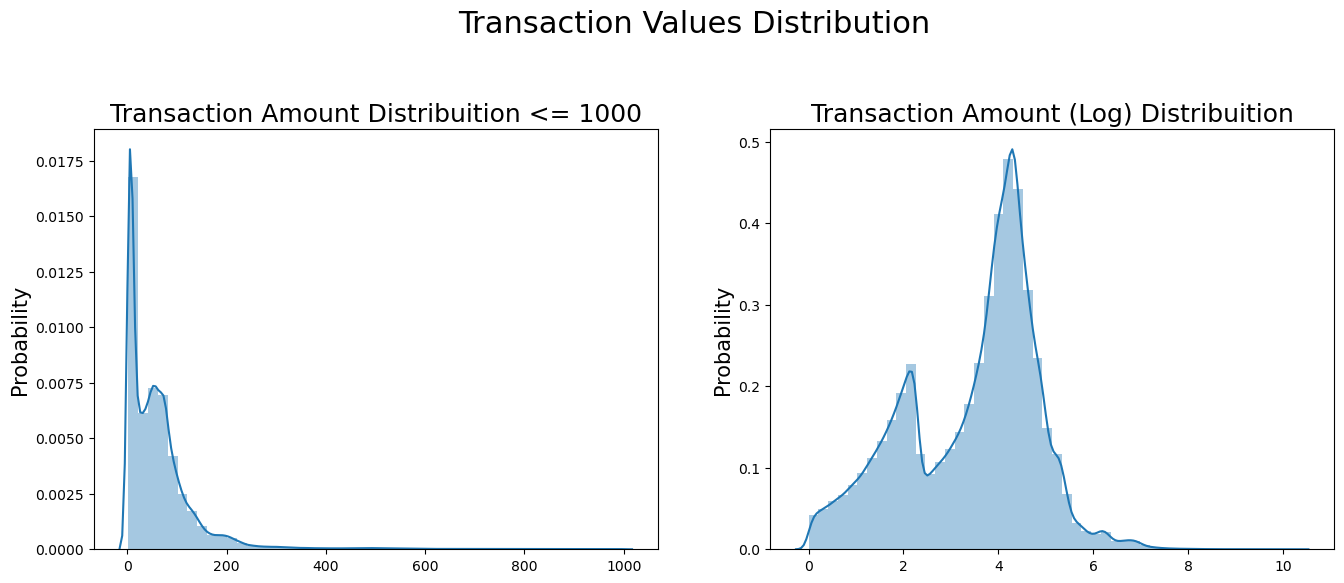

In [26]:
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
g = sns.distplot(data[data['amount'] <= 1000]['amount'])
g.set_title("Transaction Amount Distribuition <= 1000", fontsize=18)
g.set_xlabel("")
g.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
g1 = sns.distplot(np.log(data['amount']))
g1.set_title("Transaction Amount (Log) Distribuition", fontsize=18)
g1.set_xlabel("")
g1.set_ylabel("Probability", fontsize=15)

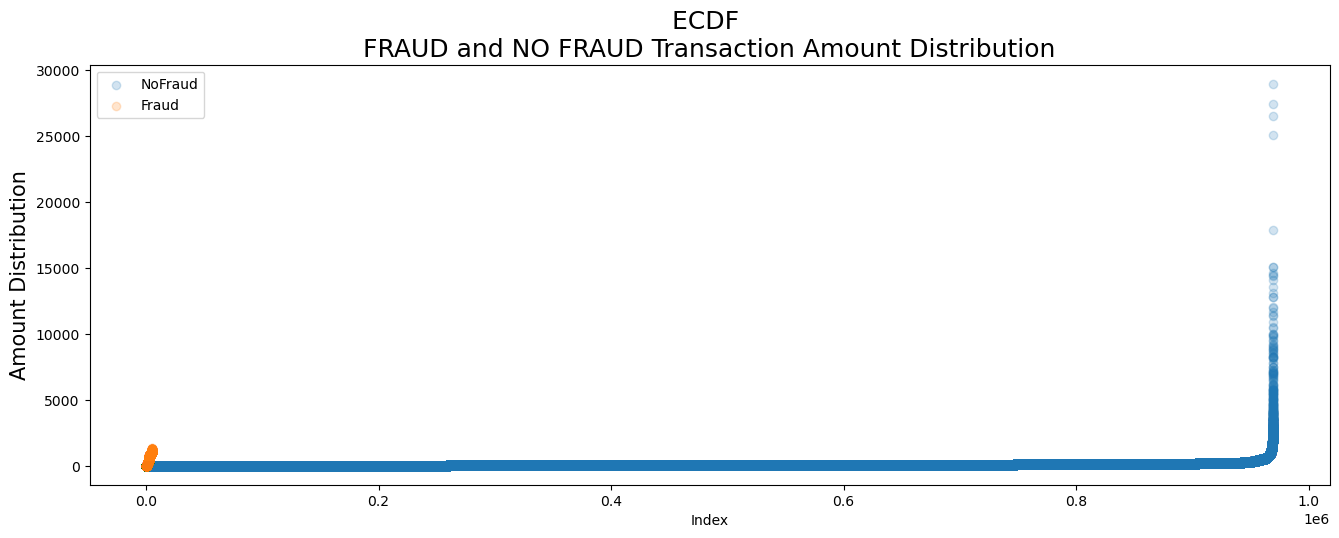

In [27]:
plt.figure(figsize=(16,12))


plt.subplot(212)
g4 = plt.scatter(range(data[data['fraud'] == 0].shape[0]),
                 np.sort(data[data['fraud'] == 0]['amount'].values), 
                 label='NoFraud', alpha=.2)
g4 = plt.scatter(range(data[data['fraud'] == 1].shape[0]),
                 np.sort(data[data['fraud'] == 1]['amount'].values), 
                 label='Fraud', alpha=.2)
g4= plt.title("ECDF \nFRAUD and NO FRAUD Transaction Amount Distribution", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("Amount Distribution", fontsize=15)
g4 = plt.legend()


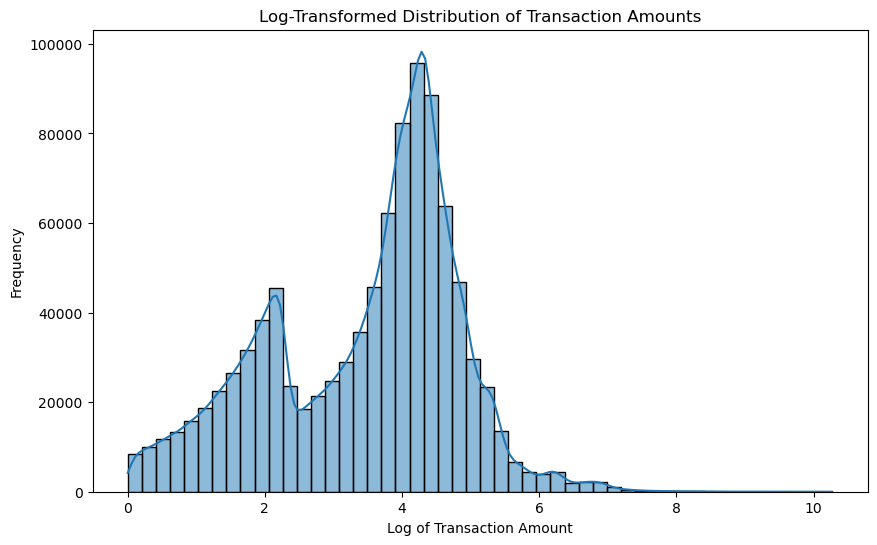

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(data['amount']), kde=True, bins=50)
plt.title('Log-Transformed Distribution of Transaction Amounts')
plt.xlabel('Log of Transaction Amount')
plt.ylabel('Frequency')
plt.show()

### Feature 6: First Name

In [29]:
print("Unique Values: ",data['first_name'].nunique()) # Unique values
print(data['first_name'].describe())
print(data['first_name'].value_counts())

Unique Values:  346
count          975036
unique            346
top       Christopher
freq            19959
Name: first_name, dtype: object
first_name
Christopher    19959
Robert         16283
Jessica        15419
Michael        14997
David          14934
               ...  
Dennis            11
Calvin             9
Arthur             9
Phyllis            8
Angelica           7
Name: count, Length: 346, dtype: int64


### Feature 7: Last Name

In [30]:
print("Unique Values: ",data['last_name'].nunique()) # Unique values
print(data['last_name'].describe())
print(data['last_name'].value_counts())

Unique Values:  478
count     975036
unique       478
top        Smith
freq       21759
Name: last_name, dtype: object
last_name
Smith        21759
Williams     17651
Davis        16386
Johnson      15171
Rodriguez    13107
             ...  
Brewer          10
Contreras        9
Wells            9
Norris           7
Schaefer         7
Name: count, Length: 478, dtype: int64


### Feature 8: Gender

In [31]:
print("Unique Values: ",data['gender'].nunique()) # Unique values
print(data['gender'].describe())

Unique Values:  2
count     975036
unique         2
top            F
freq      533568
Name: gender, dtype: object


Absolute & Relative Frequency of gender :


,Absolute Frequency,Relative Frequency(%)
gender,,
F,533568,54.72
M,441468,45.28


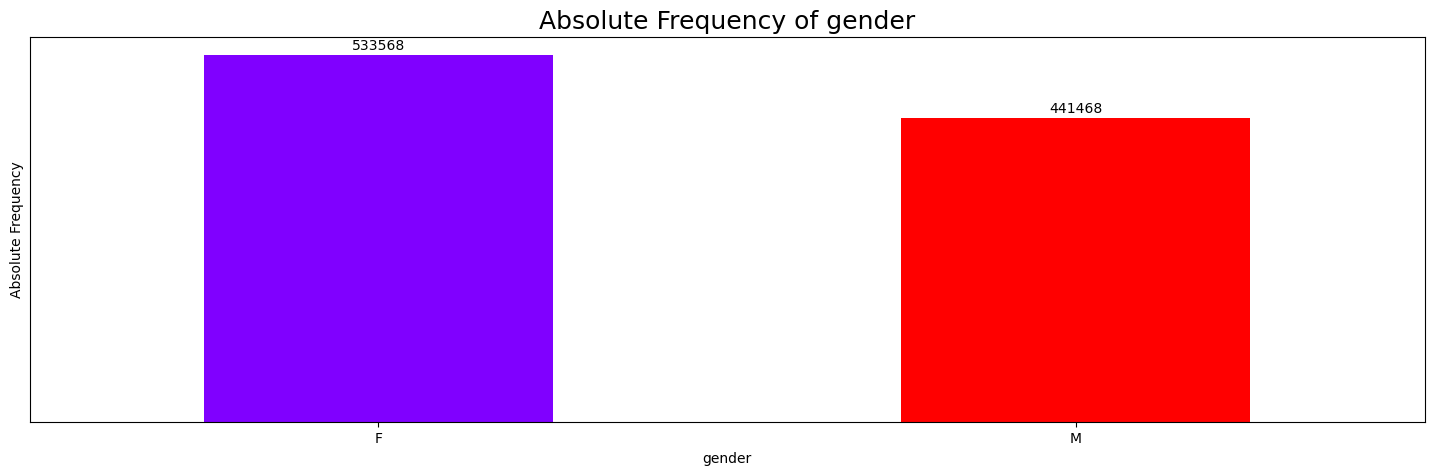

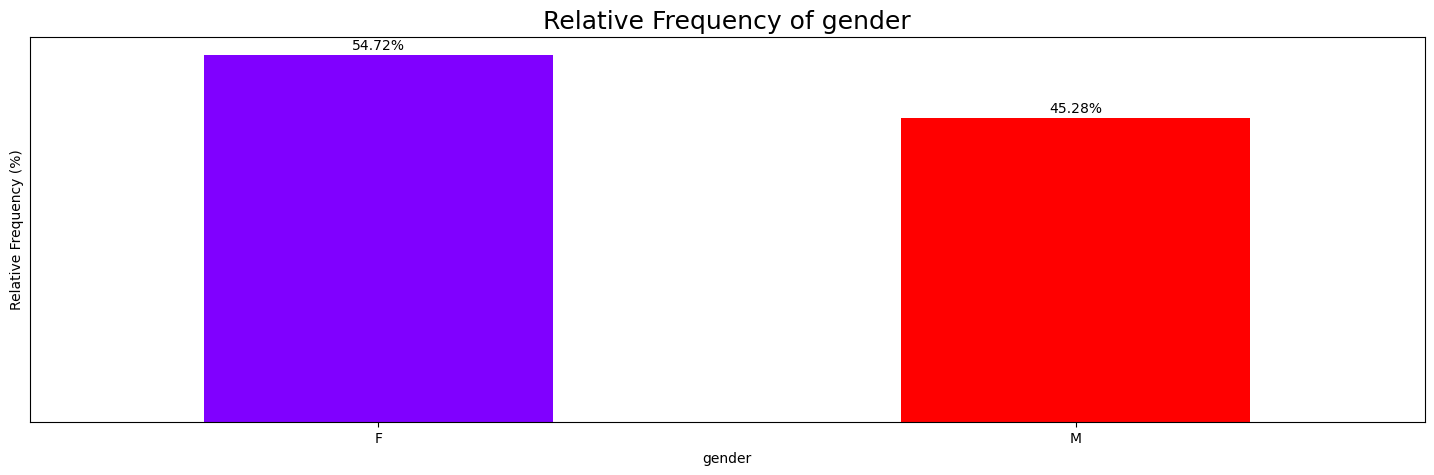

In [32]:
# Univariate plot of the 'gender' column
absolute_and_relative_freq(data.gender)

**Percentage Count of Gender by Fraud (0 or 1):**

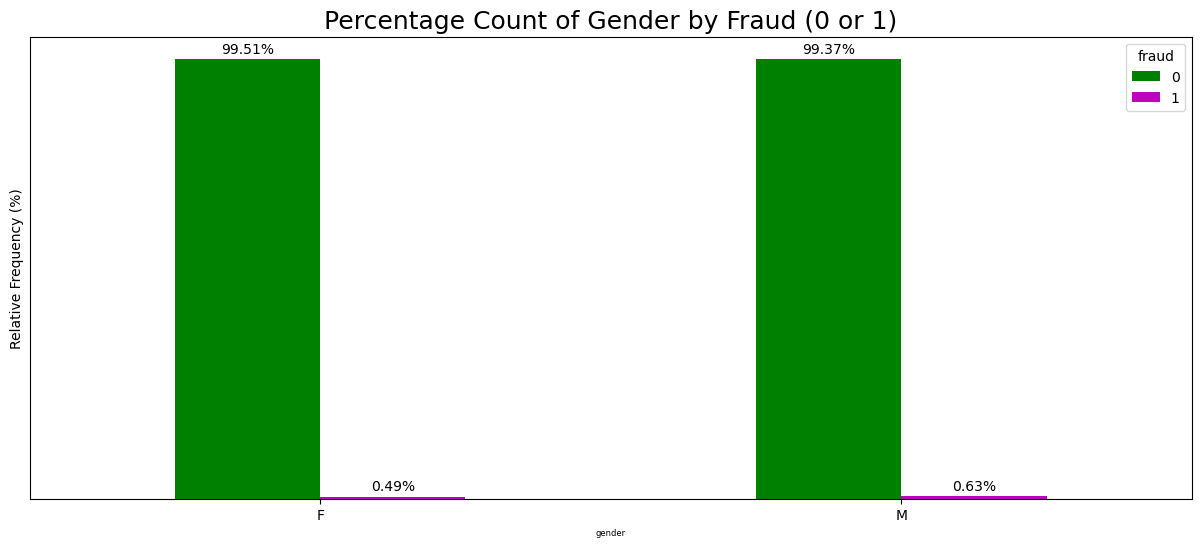

In [33]:


'''Plot the binary variables in relative scale'''

bold('**Percentage Count of Gender by Fraud (0 or 1):**')
crosstab1(data.gender, data.fraud,  color = ['g', 'm'])

### gender encode

In [34]:
# Encode gender (F as 0, M as 1)
gender_encoding = {'F': 1, 'M': 0}
data['gender_encoded'] = data['gender'].map(gender_encoding)

### Feature 9: Street

In [35]:
print("Unique Values: ",data['street'].nunique()) # Unique values
print(data['street'].describe())
print(data['street'].value_counts())

Unique Values:  960
count                            975036
unique                              960
top       4664 Sanchez Common Suite 930
freq                               2408
Name: street, dtype: object
street
4664 Sanchez Common Suite 930      2408
854 Walker Dale Suite 488          2378
2870 Bean Terrace Apt. 756         2369
0069 Robin Brooks Apt. 695         2363
29606 Martinez Views Suite 653     2354
                                   ... 
5124 Wendy Skyway Suite 154           7
5273 Joseph Isle Suite 518            7
7065 Whitney Mountains                7
3437 Ross Flat Apt. 592               7
4940 Donald Throughway Apt. 219       3
Name: count, Length: 960, dtype: int64


### Feature 10: City

In [36]:
print("Unique Values: ",data['city'].nunique()) # Unique values
print(data['city'].describe())
print(data['city'].value_counts())

Unique Values:  876
count         975036
unique           876
top       Birmingham
freq            4182
Name: city, dtype: object
city
Birmingham     4182
San Antonio    3865
Meridian       3857
Utica          3833
Phoenix        3798
               ... 
Chattanooga       7
Karns City        7
Norfolk           7
Claypool          7
Vacaville         3
Name: count, Length: 876, dtype: int64


### Feature 11: State

In [37]:
print("Unique Values: ",data['state'].nunique()) # Unique values
print(data['state'].describe())
print(data['state'].value_counts())

Unique Values:  51
count     975036
unique        51
top           TX
freq       71417
Name: state, dtype: object
state
TX    71417
NY    62528
PA    59937
CA    42542
OH    34805
MI    34584
IL    32628
FL    32236
AL    30859
MO    28865
MN    23965
AR    23232
NC    22914
WI    22134
SC    21969
VA    21924
KY    21411
IN    20708
IA    20184
OK    20035
MD    19740
GA    19547
WV    19329
NJ    18554
NE    18239
KS    17294
MS    15890
LA    15830
WY    14627
WA    14169
OR    14022
TN    13154
ME    12451
NM    12365
ND    11320
CO    10366
MA     9311
SD     9216
VT     8839
MT     8738
UT     8118
AZ     8020
NH     6228
CT     5805
NV     4226
ID     4177
DC     2691
HI     1899
AK     1574
RI      411
DE        9
Name: count, dtype: int64


Absolute & Relative Frequency of state :


,Absolute Frequency,Relative Frequency(%)
state,,
TX,71417,7.32
NY,62528,6.41
PA,59937,6.15
CA,42542,4.36
OH,34805,3.57
MI,34584,3.55
IL,32628,3.35
FL,32236,3.31
AL,30859,3.16


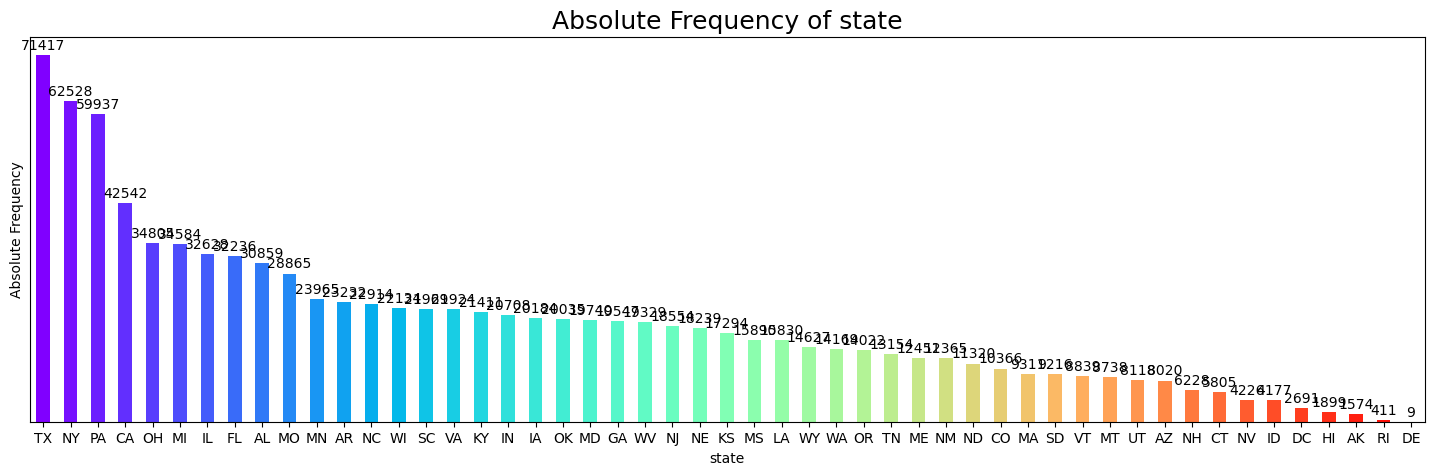

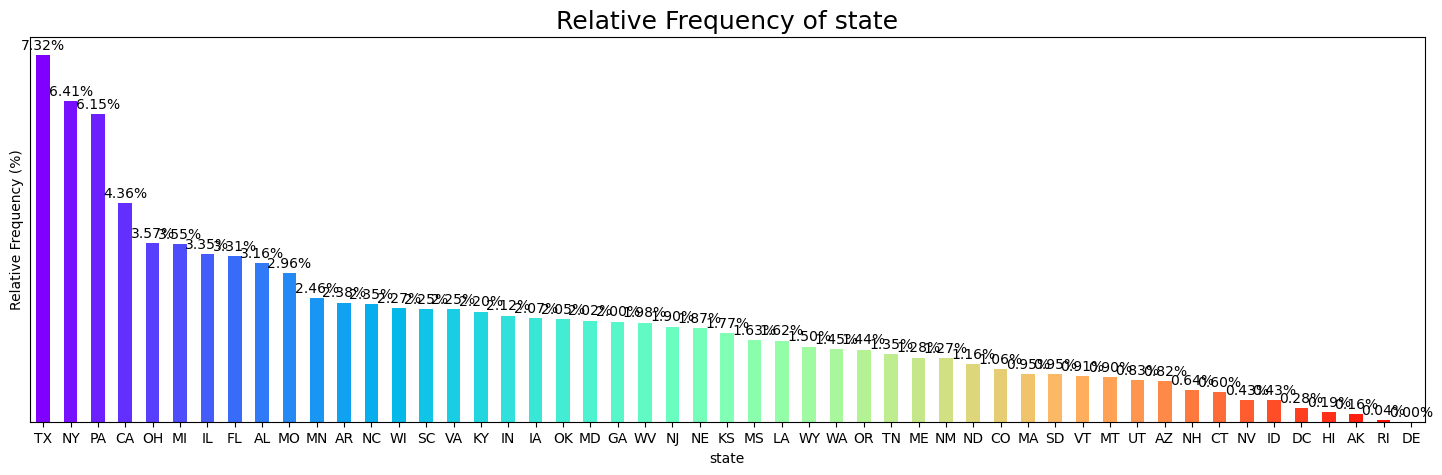

In [38]:
absolute_and_relative_freq(data.state)

In [39]:
state_counts = data['state'].value_counts().sort_index()

# Checking the relationship between 'state' and 'fraud'
state_fraud_relation = data.groupby('state')['fraud'].mean()
#sort_values(ascending=False)
bold('**State Names || State Counts || Target Mean Encoded :**')
for i in range(0, data.state.nunique()):
    print(state_counts.index[i], state_counts[i], state_fraud_relation[i])


**State Names || State Counts || Target Mean Encoded :**

AK 1574 0.007623888182973317
AL 30859 0.005314494960951424
AR 23232 0.005853994490358127
AZ 8020 0.003740648379052369
CA 42542 0.005171360067697805
CO 10366 0.00762106887902759
CT 5805 0.002756244616709733
DC 2691 0.004087699739873653
DE 9 1.0
FL 32236 0.007134880258096538
GA 19547 0.004757763339642912
HI 1899 0.003686150605581885
IA 20184 0.005103051922314705
ID 4177 0.0026334689968877186
IL 32628 0.005976461934534756
IN 20708 0.003959822290902067
KS 17294 0.004741528853937782
KY 21411 0.006118350380645463
LA 15830 0.004737839545167404
MA 9311 0.005262592632370315
MD 19740 0.0060790273556231
ME 12451 0.005622038390490723
MI 34584 0.005493869997686792
MN 23965 0.006968495722929272
MO 28865 0.005543045210462498
MS 15890 0.004027690371302706
MT 8738 0.0036621652552071412
NC 22914 0.003927729772191673
ND 11320 0.0034452296819787987
NE 18239 0.007017928614507374
NH 6228 0.007867694283879255
NJ 18554 0.004689015845639754
NM 12365 0.005014152850788516
NV 4226 0.009228584950307619
NY 62528 0.

In [40]:
data.state.nunique()

51

**Percentage Count of fraud by state:**

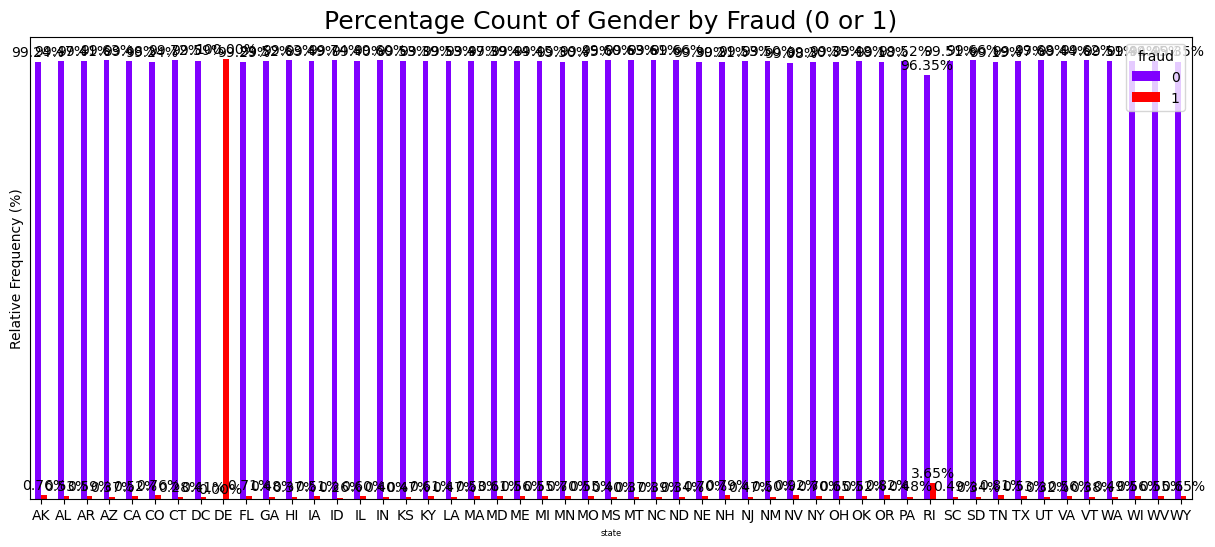

In [41]:
bold('**Percentage Count of fraud by state:**')
sorted_unique_values = sorted(data.fraud.unique())
absolute_frequency = data.fraud.value_counts()
color = plt.cm.rainbow(np.linspace(0, 1, len(sorted_unique_values)))
crosstab1(data.state, data.fraud, color)

## Apply Some tpye of Encoding to the states

In [42]:
# Mean Encoding

state_mean = data.groupby('state')['fraud'].mean()
data['state_mean_enc'] = data['state'].map(state_mean)


In [43]:
data['state_mean_enc'].head()

0    0.003960
1    0.006495
2    0.005241
3    0.006493
4    0.005014
Name: state_mean_enc, dtype: float64

##### Frequency encoding preserves the frequency information of each state, while mean encoding leverages the target variable's relationship with the state feature.

### Feature 12: Zip Code

In [44]:
print("Unique Values: ",data['zip_code'].nunique()) # Unique values
print(data['zip_code'].describe())
print(data['zip_code'].value_counts())

Unique Values:  947
count    975036.000000
mean      48815.857405
std       26893.862150
min        1257.000000
25%       26237.000000
50%       48174.000000
75%       72042.000000
max       99783.000000
Name: zip_code, dtype: float64
zip_code
34112    2743
73754    2729
48088    2713
82514    2675
29819    2408
         ... 
16041       7
46510       7
37411       7
23523       7
95688       3
Name: count, Length: 947, dtype: int64


## Group Zip Code to generate a new parameter

### Feature 13: Latitude

In [45]:
print("Unique Values: ",data['latitude'].nunique()) # Unique values
print(data['latitude'].describe())
print(data['latitude'].value_counts())

Unique Values:  945
count    975036.000000
mean         38.534111
std           5.076803
min          20.027100
25%          34.620500
50%          39.354300
75%          41.940400
max          66.693300
Name: latitude, dtype: float64
latitude
26.1184    2743
36.3850    2729
42.5164    2713
43.0048    2675
34.0326    2408
           ... 
35.0271       7
40.7547       7
41.1165       7
36.8294       7
38.3847       3
Name: count, Length: 945, dtype: int64


### Feature 14: Longitude

In [46]:
print("Unique Values: ",data['longitude'].nunique()) # Unique values
print(data['longitude'].describe())
print(data['longitude'].value_counts())

Unique Values:  946
count    975036.000000
mean        -90.231395
std          13.754579
min        -165.672300
25%         -96.798000
50%         -87.476900
75%         -80.158000
max         -67.950300
Name: longitude, dtype: float64
longitude
-81.7361     2743
-98.0727     2729
-82.9832     2713
-108.8964    2675
-82.2027     2408
             ... 
-79.7160        7
-85.8686        7
-85.2356        7
-76.2701        7
-121.9887       3
Name: count, Length: 946, dtype: int64


### Feature 15: City Population

In [47]:
print("Unique Values: ",data['city_population'].nunique()) # Unique values
print(data['city_population'].describe())
print(data['city_population'].value_counts())

Unique Values:  863
count    9.750360e+05
mean     8.904288e+04
std      3.025941e+05
min      2.300000e+01
25%      7.430000e+02
50%      2.456000e+03
75%      2.032800e+04
max      2.906700e+06
Name: city_population, dtype: float64
city_population
606        4062
1595797    3865
1312922    3798
1766       3416
241        3392
           ... 
1888          7
3631          7
242803        7
198659        7
99475         3
Name: count, Length: 863, dtype: int64


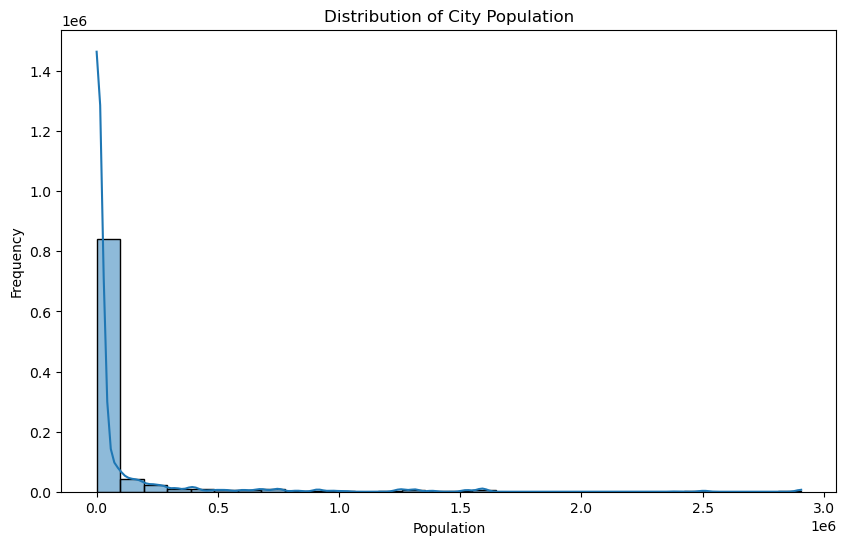

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data['city_population'], kde=True, bins=30)
plt.title('Distribution of City Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Probability')

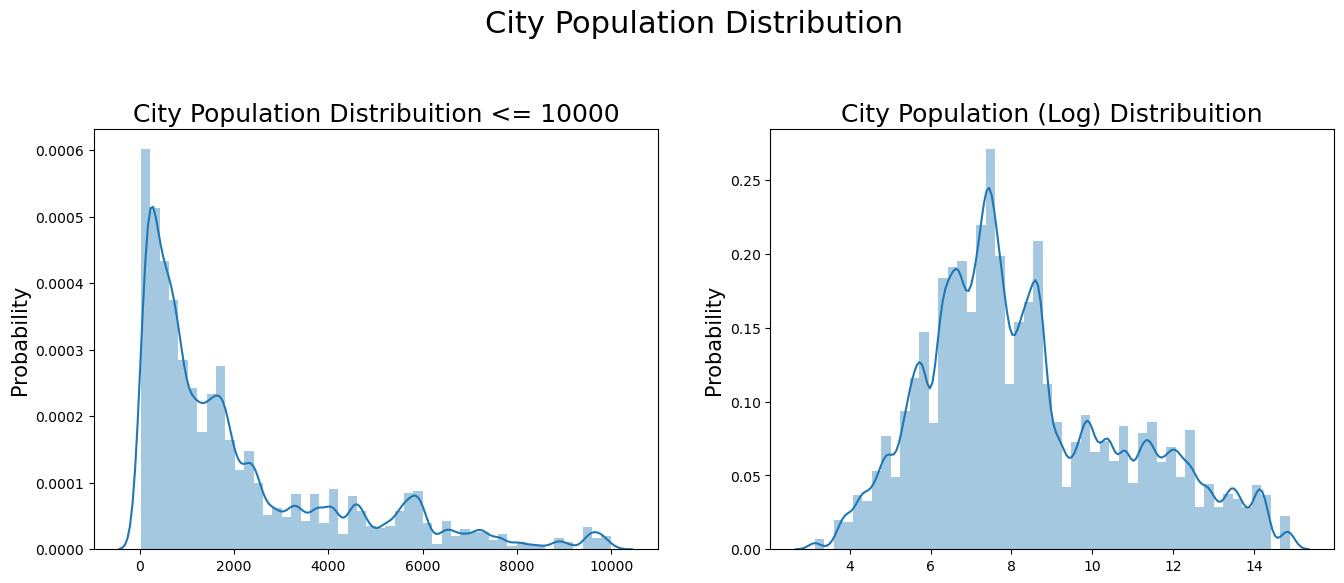

In [49]:
plt.figure(figsize=(16,12))
plt.suptitle('City Population Distribution', fontsize=22)
plt.subplot(221)
g = sns.distplot(data[data['city_population'] <= 10000]['city_population'])
g.set_title("City Population Distribuition <= 10000", fontsize=18)
g.set_xlabel("")
g.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
g1 = sns.distplot(np.log(data['city_population']))
g1.set_title("City Population (Log) Distribuition", fontsize=18)
g1.set_xlabel("")
g1.set_ylabel("Probability", fontsize=15)

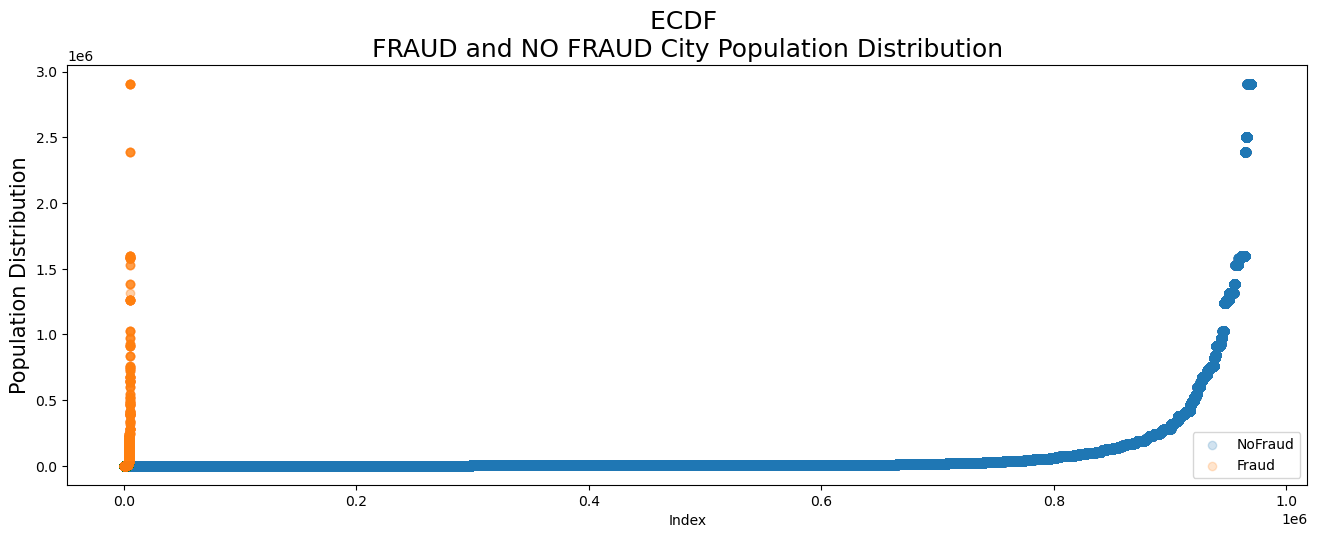

In [50]:
plt.figure(figsize=(16,12))


plt.subplot(212)
g4 = plt.scatter(range(data[data['fraud'] == 0].shape[0]),
                 np.sort(data[data['fraud'] == 0]['city_population'].values), 
                 label='NoFraud', alpha=.2)
g4 = plt.scatter(range(data[data['fraud'] == 1].shape[0]),
                 np.sort(data[data['fraud'] == 1]['city_population'].values), 
                 label='Fraud', alpha=.2)
g4= plt.title("ECDF \nFRAUD and NO FRAUD City Population Distribution", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("Population Distribution", fontsize=15)
g4 = plt.legend()


### Feature 16: Job


In [51]:

print("Unique Values: ",data['job'].nunique()) # Unique values
print(data['job'].describe())
print(data['job'].value_counts())

Unique Values:  491
count                975036
unique                  491
top       Film/video editor
freq                   7426
Name: job, dtype: object
job
Film/video editor             7426
Exhibition designer           6887
Surveyor, land/geomatics      6539
Naval architect               6523
Materials engineer            6284
                              ... 
Air traffic controller           8
Veterinary surgeon               8
Information officer              8
Ship broker                      7
Contracting civil engineer       7
Name: count, Length: 491, dtype: int64


##  Apply Some Encoding to Job Also

In [52]:
# Mean Encoding

job_mean = data.groupby('job')['fraud'].mean()
data['job_mean_enc'] = data['job'].map(job_mean)


### Feature 17: Day of Birth

In [53]:
print("Unique Values: ",data['day_of_birth'].nunique()) # Unique values
print(data['day_of_birth'].describe())
print(data['day_of_birth'].value_counts())

Unique Values:  945
count        975036
unique          945
top       3/23/1977
freq           4256
Name: day_of_birth, dtype: object
day_of_birth
3/23/1977    4256
8/29/1981    3502
9/15/1988    3461
5/6/1955     2772
6/3/1984     2408
             ... 
6/17/1944       7
2/20/1963       7
2/15/1949       7
2/26/1963       7
6/25/1970       3
Name: count, Length: 945, dtype: int64


#### We can derive Age from this feature

In [54]:
from datetime import datetime

# Function to calculate age from birthdate
def calculate_age(birthdate):
    birthdate = datetime.strptime(birthdate, "%m/%d/%Y")
    today = datetime.now()
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))



In [55]:
# Calculate age for each row
data['encoded_age'] = data['day_of_birth'].apply(calculate_age)
print("Unique Values: ",data['encoded_age'].nunique())
print(data['encoded_age'].describe())
print(data['encoded_age'].value_counts())

Unique Values:  80
count    975036.000000
mean         49.874260
std          17.376363
min          19.000000
25%          36.000000
50%          48.000000
75%          61.000000
max          99.000000
Name: encoded_age, dtype: float64
encoded_age
51    31682
39    31429
38    28114
36    27528
48    25794
      ...  
76     2279
91     1582
86     1547
99      425
98       11
Name: count, Length: 80, dtype: int64


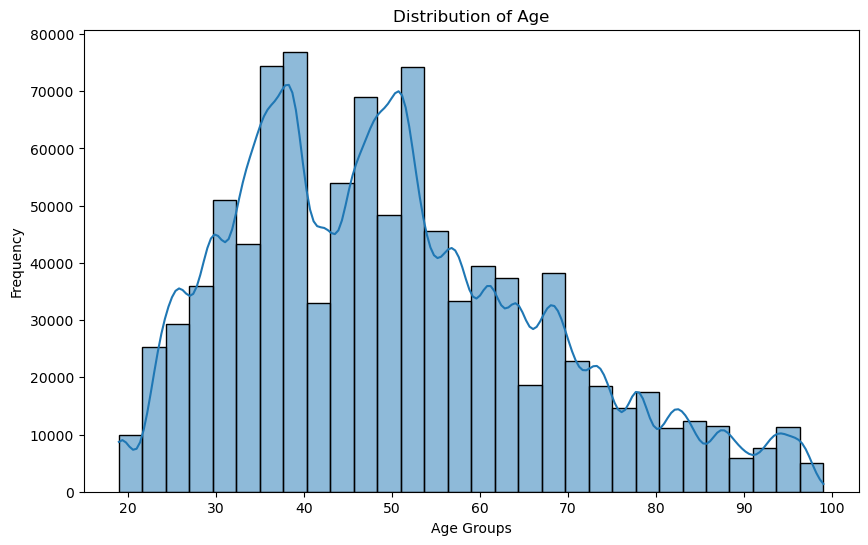

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(data['encoded_age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.show()

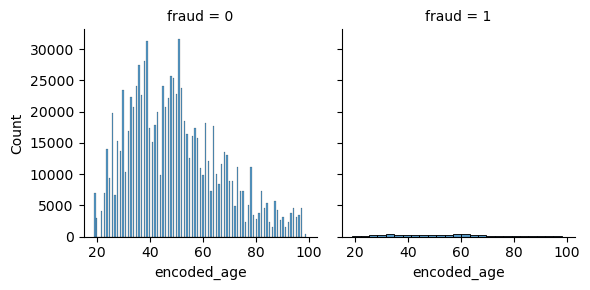

In [57]:
g = sns.FacetGrid(data, col='fraud')
g.map(sns.histplot, 'encoded_age')

### Feature 18: trans_number

In [58]:
print("Unique Values: ",data['trans_number'].nunique())
print(data['trans_number'].describe())
print(data['trans_number'].value_counts())

Unique Values:  975036
count                               975036
unique                              975036
top       0442179ed2d64942bc45c5442c3d5895
freq                                     1
Name: trans_number, dtype: object
trans_number
0442179ed2d64942bc45c5442c3d5895    1
271013d87e295cb285ca3fcb65b3e5de    1
a60c10689d344835f34d4d42dcf918cd    1
21f6c1fad2bf534b00c2f872df0c2184    1
a13792d654570fd72df89fbb2b156852    1
                                   ..
b9a3d4f7c3dc5ce62a32f421c9bcc154    1
5fdae27815d10f0a5fd8dc8772addb80    1
895916dffa191f7eaf95b0699db4efbc    1
0b8758e1e7d4d4a51f8f19bc3d4bf770    1
894e23c22aff3c694a317251dc1b0641    1
Name: count, Length: 975036, dtype: int64


##### It is an identifier so we will not need this information

### Feature 19: Unix_time

In [59]:
print("Unique Values: ",data['unix_time'].nunique())
print(data['unix_time'].describe())
print(data['unix_time'].value_counts())

Unique Values:  958061
count    9.750360e+05
mean     1.345505e+09
std      9.320993e+06
min      1.328055e+09
25%      1.337961e+09
50%      1.345381e+09
75%      1.354320e+09
max      1.362182e+09
Name: unix_time, dtype: float64
unix_time
1335110521    4
1346618083    3
1356751139    3
1339282927    3
1356978443    3
             ..
1340474093    1
1340474094    1
1340474109    1
1340474122    1
1362182379    1
Name: count, Length: 958061, dtype: int64


##### Skipping as we have trans_date_time

### Feature 20: merchant_lat

In [60]:
print("Unique Values: ",data['merchant_lat'].nunique()) # Unique values
print(data['merchant_lat'].describe())
print(data['merchant_lat'].value_counts())

Unique Values:  947225
count    975036.000000
mean         38.534049
std           5.111292
min          19.027785
25%          34.730153
50%          39.364304
75%          41.958414
max          67.510267
Name: merchant_lat, dtype: float64
merchant_lat
40.772096    4
40.550199    4
40.351897    4
38.686512    4
42.889354    4
            ..
39.201519    1
28.427942    1
36.425310    1
42.502656    1
35.545742    1
Name: count, Length: 947225, dtype: int64


### Feature 21: merchant_long

In [61]:
print("Unique Values: ",data['merchant_long'].nunique()) # Unique values
print(data['merchant_long'].describe())
print(data['merchant_long'].value_counts())

Unique Values:  963180
count    975036.000000
mean        -90.231559
std          13.766833
min        -166.671242
25%         -96.900836
50%         -87.448250
75%         -80.239186
max         -66.950902
Name: merchant_long, dtype: float64
merchant_long
-76.461578     3
-93.094774     3
-86.442449     3
-81.955695     3
-97.128150     3
              ..
-86.401381     1
-95.137405     1
-91.058629     1
-104.721127    1
-92.755333     1
Name: count, Length: 963180, dtype: int64


### Feature 22: Fraud

In [62]:
print("Unique Values: ",data['fraud'].nunique()) # Unique values
print(data['fraud'].describe())
print(data['fraud'].value_counts())

Unique Values:  2
count    975036.000000
mean          0.005551
std           0.074295
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: fraud, dtype: float64
fraud
0    969624
1      5412
Name: count, dtype: int64


Absolute & Relative Frequency of fraud :


,Absolute Frequency,Relative Frequency(%)
fraud,,
0,969624,99.44
1,5412,0.56


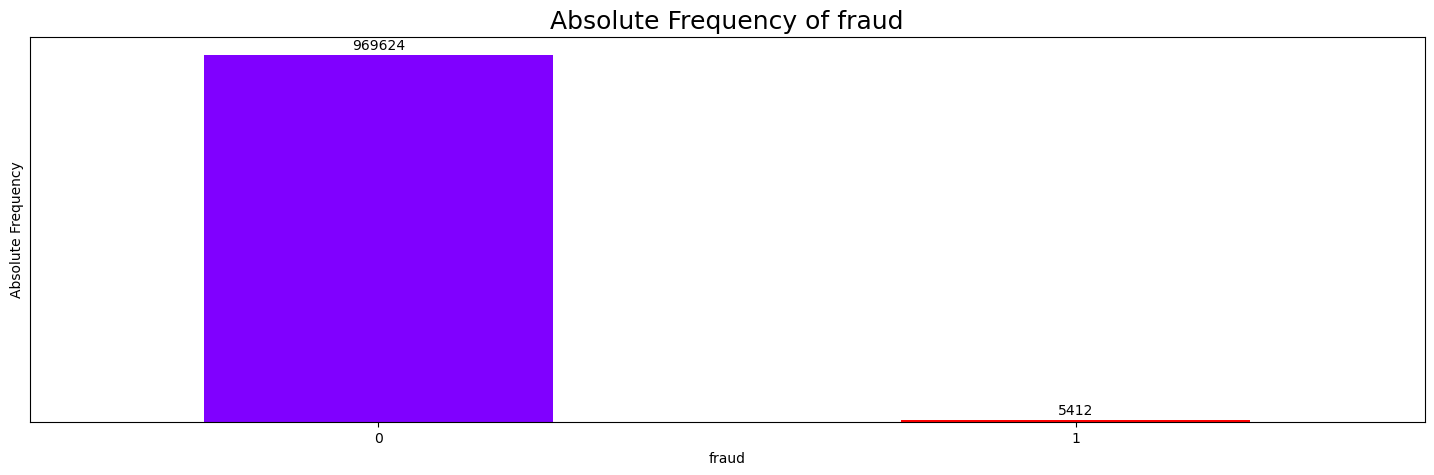

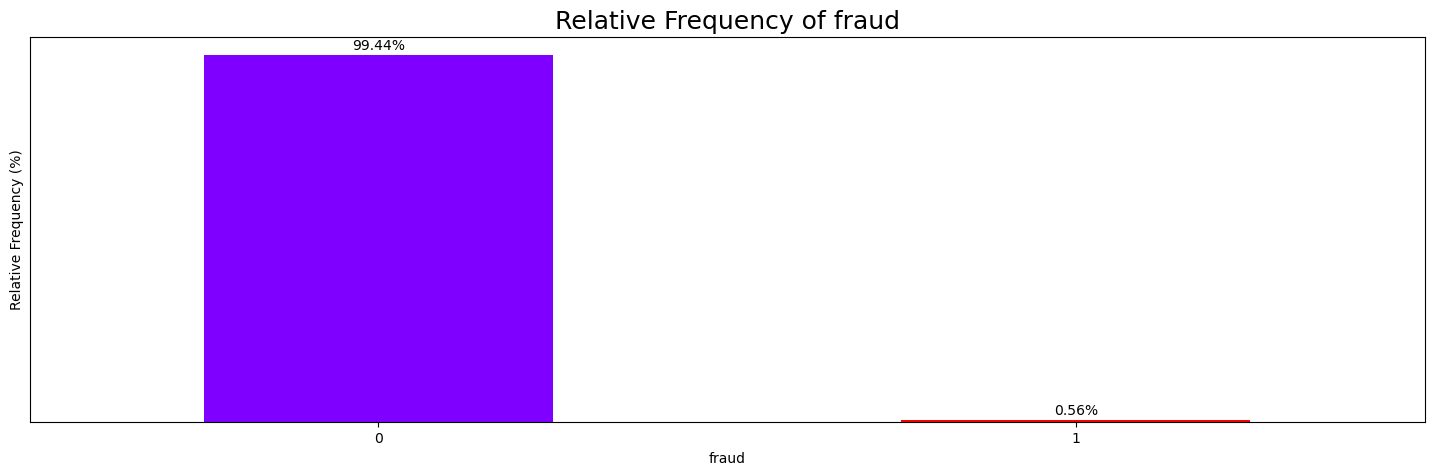

In [63]:
'''Plot and count the target variable in absolute and relative scale'''
absolute_and_relative_freq(data.fraud)

In [64]:
'''#4.Create a function that relative frequency of Target variable by a categorical variable. And then plots the relative frequency of target by a categorical variable.'''
def crosstab(cat, cat_target, color):
    '''cat = categorical variable, cat_target = our target categorical variable.'''
    global ax1
    fig_size = (28, 6)
    title_size = 18
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = cat, columns = cat_target)
    pct_cat_grouped_by_cat_target = round(pd.crosstab(index = cat, columns = cat_target, normalize = 'index')*100, 2)
       
    # Plot relative frequrncy of Target by a categorical variable
    ax1 = pct_cat_grouped_by_cat_target.plot.bar(color = color, title = 'Percentage Count of target by %s' %cat.name, figsize = fig_size)
    ax1.title.set_size(fontsize = title_size)
    pct_bar_labels()
    plt.xlabel(cat.name, fontsize = font_size)
    ax1.set_ylim(0, 1.1 * pct_cat_grouped_by_cat_target.max().max())
    plt.show()

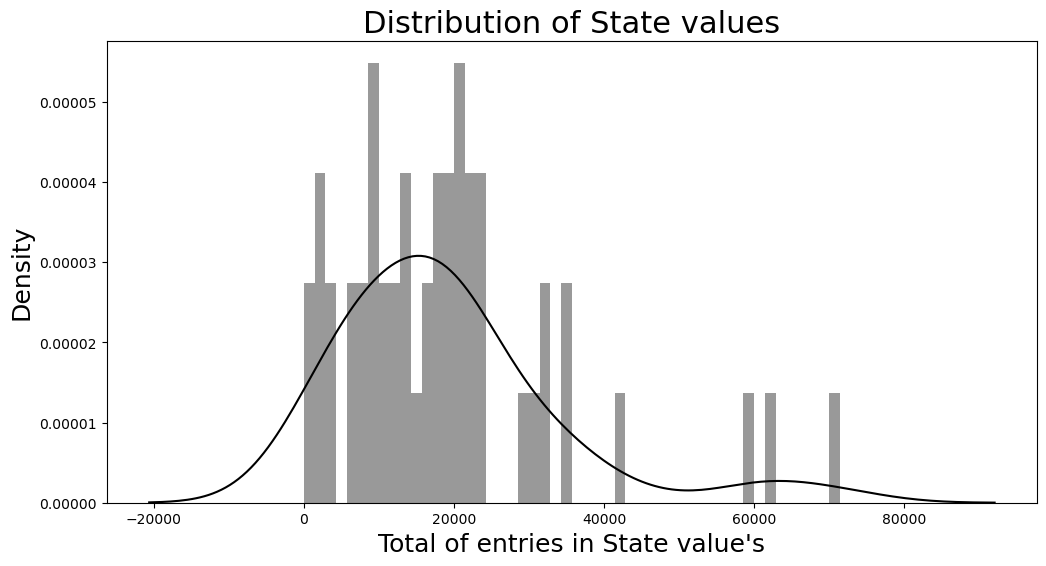

In [65]:


'''Distribution plot of State'''
ord_5_count = data['state'].value_counts()
#print(ord_5_count)
plt.figure(figsize=(12,6))

ax = sns.distplot(ord_5_count, bins= 50, color = 'k')
ax.set_title("Distribution of State values", fontsize=22)
ax.set_xlabel("Total of entries in State value's", fontsize=18)
ax.set_ylabel("Density", fontsize=18)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()





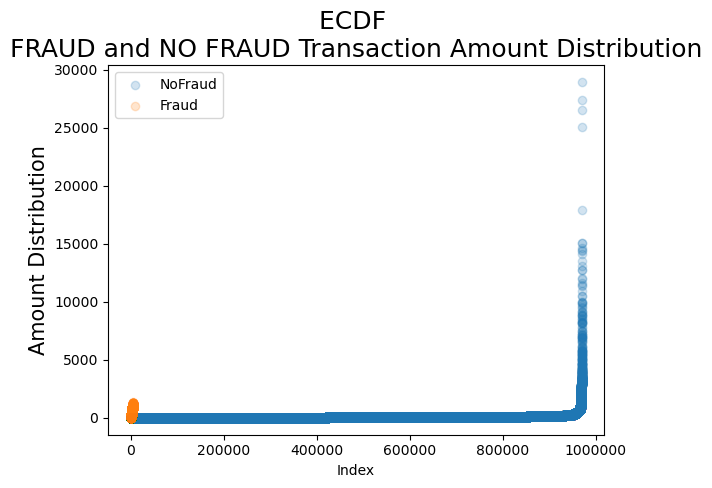

In [66]:
ECDF = plt.scatter(range(data[data['fraud'] == 0].shape[0]),
                 np.sort(data[data['fraud'] == 0]['amount'].values), 
                 label='NoFraud', alpha=.2)
ECDF = plt.scatter(range(data[data['fraud'] == 1].shape[0]),
                 np.sort(data[data['fraud'] == 1]['amount'].values), 
                 label='Fraud', alpha=.2)
ECDF= plt.title("ECDF \nFRAUD and NO FRAUD Transaction Amount Distribution", fontsize=18)
ECDF = plt.xlabel("Index")
ECDF = plt.ylabel("Amount Distribution", fontsize=15)
ECDF =plt.ticklabel_format(style='plain', axis='x', useOffset=False)
ECDF = plt.legend()


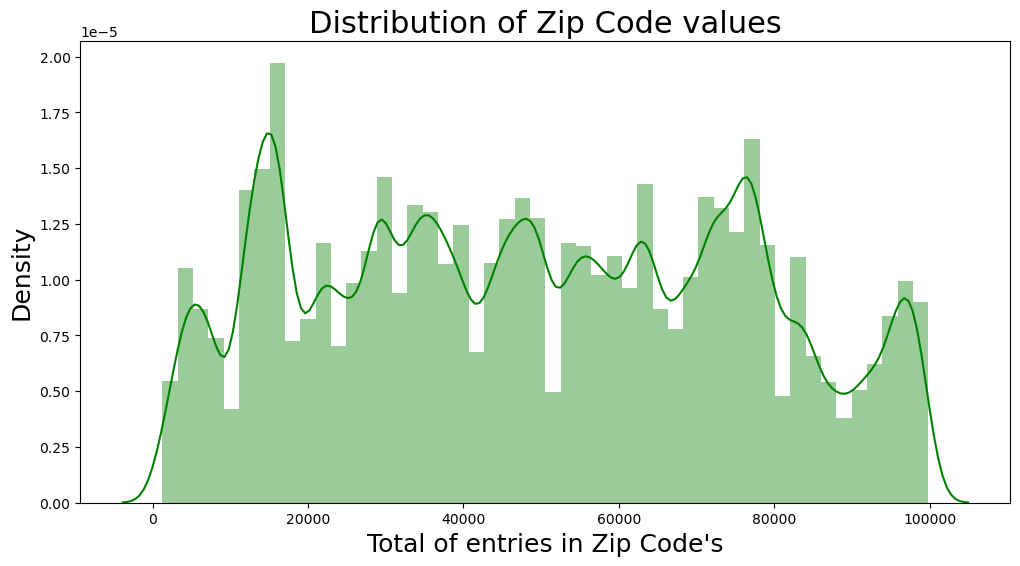

In [67]:
'''Distribution plot of day'''
plt.figure(figsize=(12,6))

ax = sns.distplot(data.zip_code, color = 'g')
ax.set_title("Distribution of Zip Code values", fontsize=22)
ax.set_xlabel("Total of entries in Zip Code's", fontsize=18)
ax.set_ylabel("Density", fontsize=18)

plt.show()

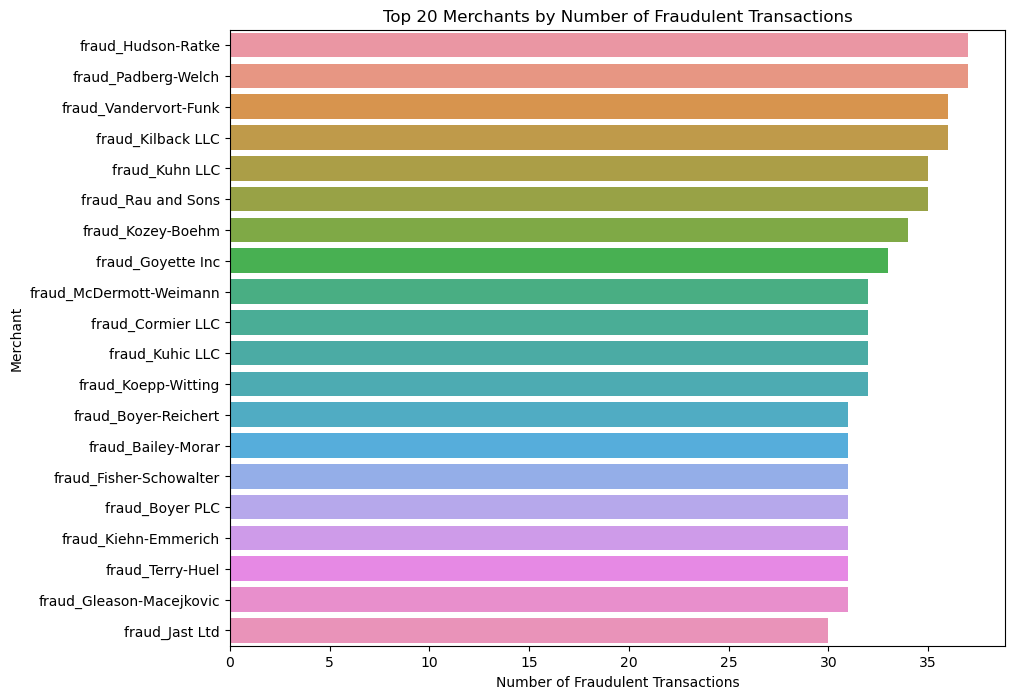

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering the dataset for only fraudulent transactions
fraudulent_transactions = data[data['fraud'] == 1]

# Counting the number of fraudulent transactions for each merchant
merchant_fraud_counts = fraudulent_transactions['merchant'].value_counts()

# Selecting the top 20 merchants for visualization
top_merchants = merchant_fraud_counts.head(20)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=top_merchants.values, y=top_merchants.index)
plt.title('Top 20 Merchants by Number of Fraudulent Transactions')
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('Merchant')
plt.show()


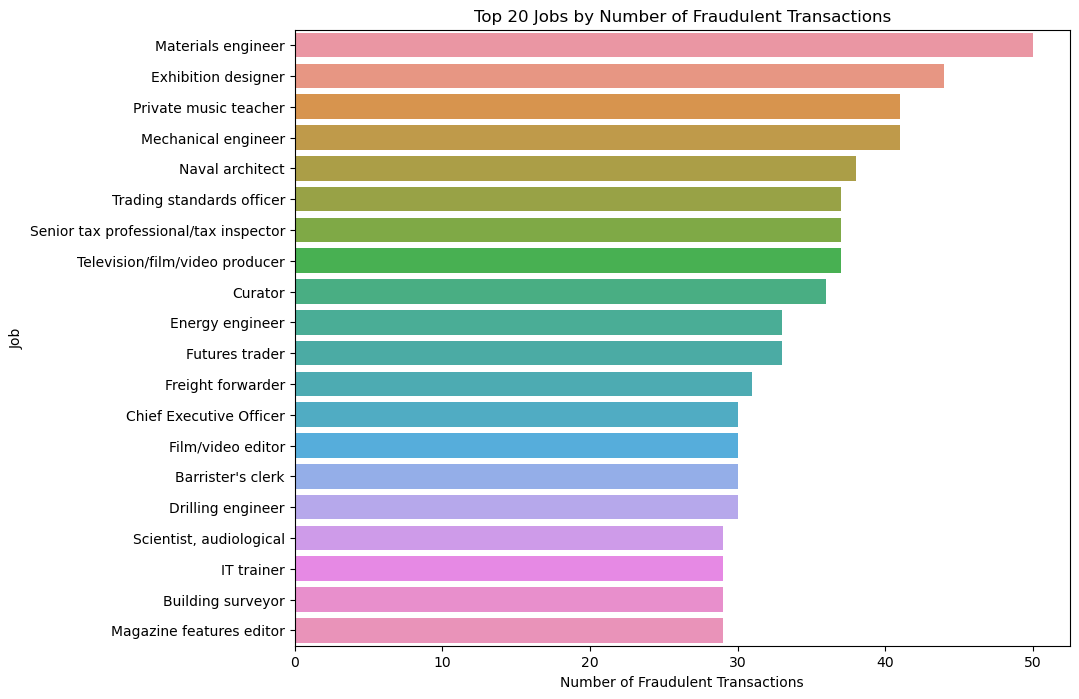

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering the dataset for only fraudulent transactions
fraudulent_transactions = data[data['fraud'] == 1]

# Counting the number of fraudulent transactions for each merchant
jobt_fraud_counts = fraudulent_transactions['job'].value_counts()

# Selecting the top 20 merchants for visualization
top_jobs = jobt_fraud_counts.head(20)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.title('Top 20 Jobs by Number of Fraudulent Transactions')
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('Job')
plt.show()


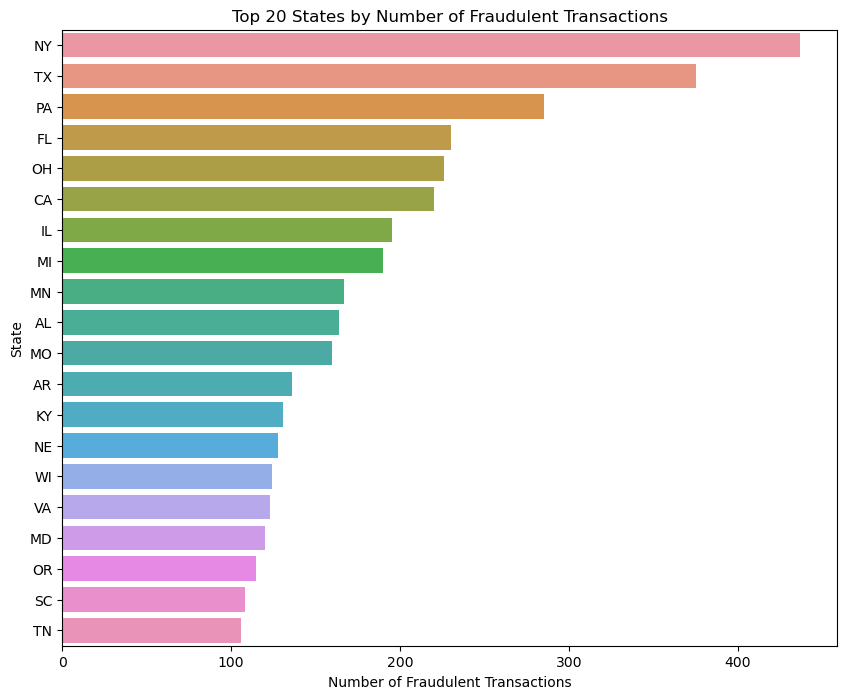

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering the dataset for only fraudulent transactions
fraudulent_transactions = data[data['fraud'] == 1]

# Counting the number of fraudulent transactions for each merchant
state_fraud_counts = fraudulent_transactions['state'].value_counts()

# Selecting the top 20 merchants for visualization
top_states = state_fraud_counts.head(20)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title('Top 20 States by Number of Fraudulent Transactions')
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('State')
plt.show()


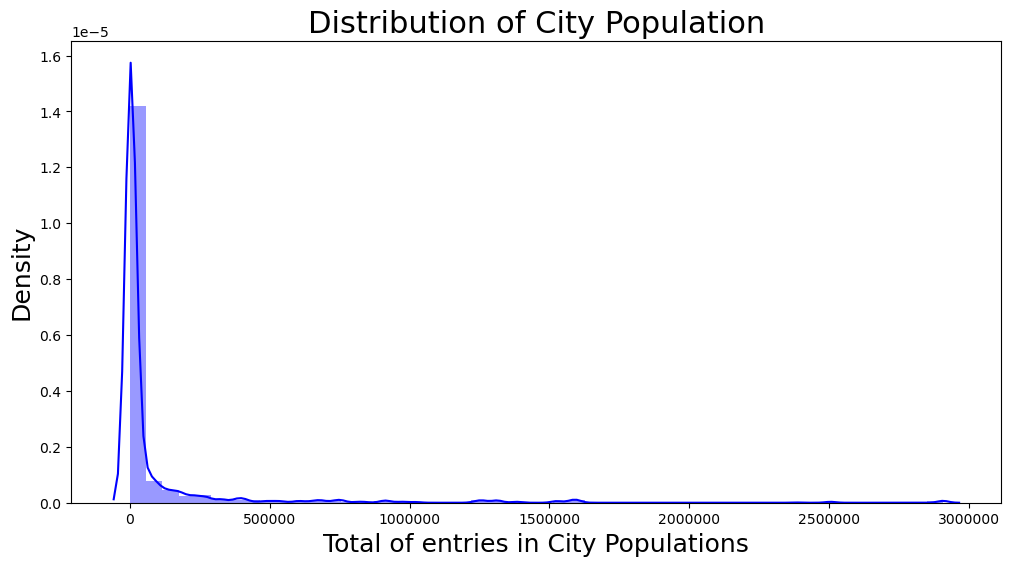

In [71]:
'''Distribution plot of day'''
plt.figure(figsize=(12,6))

ax = sns.distplot(data.city_population, color = 'b')
ax.set_title("Distribution of City Population", fontsize=22)
ax.set_xlabel("Total of entries in City Populations", fontsize=18)
ax.set_ylabel("Density", fontsize=18)
plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.show()

### Feature Engineering

### Feature Engineering of the Column

In [72]:
data['trans_date_trans_time_new'] = pd.to_datetime(data['trans_date_trans_time'])
data['transaction_hour'] = data['trans_date_trans_time_new'].dt.hour

Absolute & Relative Frequency of transaction_hour :


,Absolute Frequency,Relative Frequency(%)
transaction_hour,,
0,31982,3.28
1,32341,3.32
2,31961,3.28
3,32102,3.29
4,31571,3.24
5,31667,3.25
6,31857,3.27
7,31739,3.26
8,31855,3.27


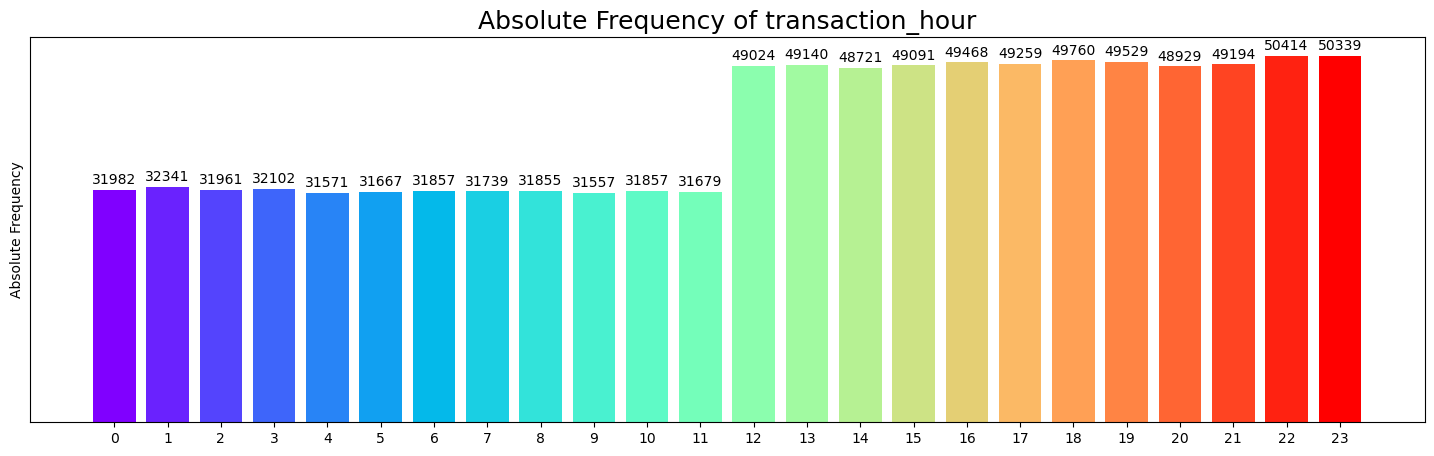

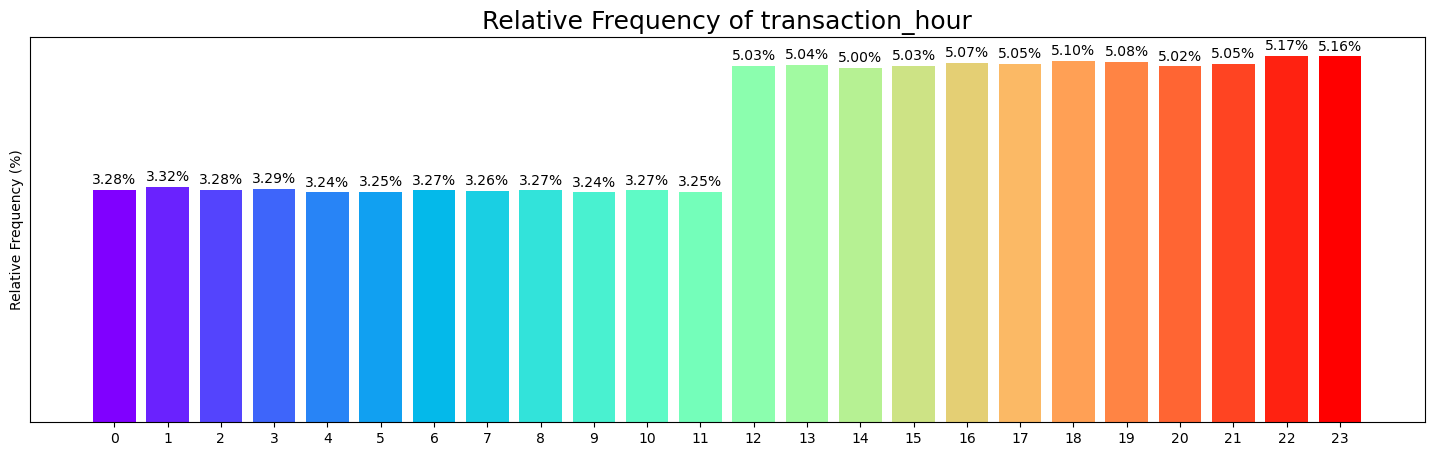

In [73]:
absolute_and_relative_freq1(data.transaction_hour)

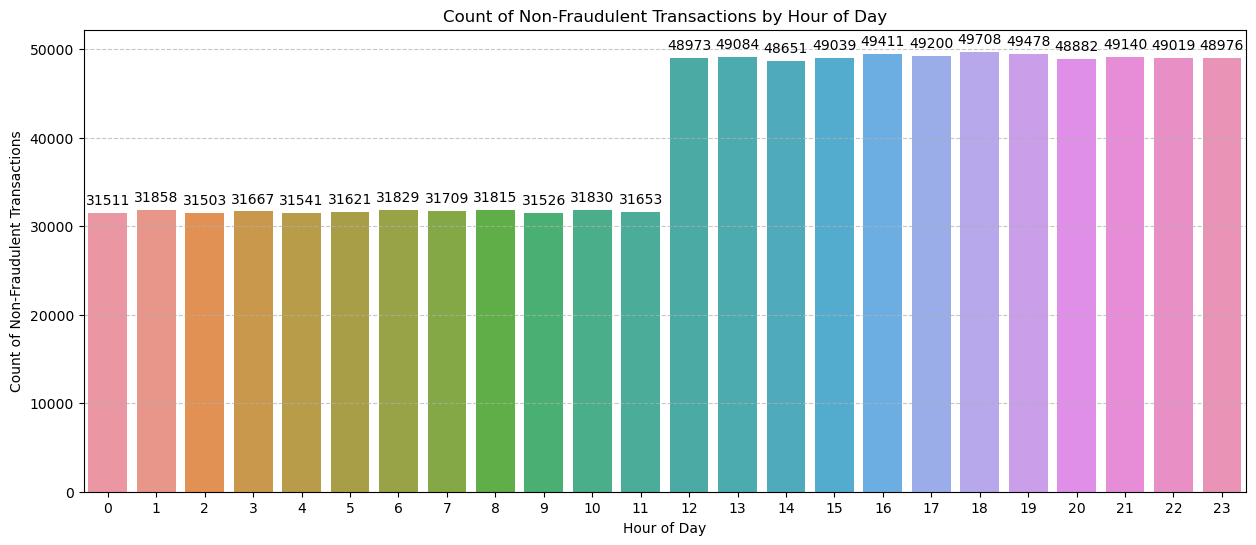

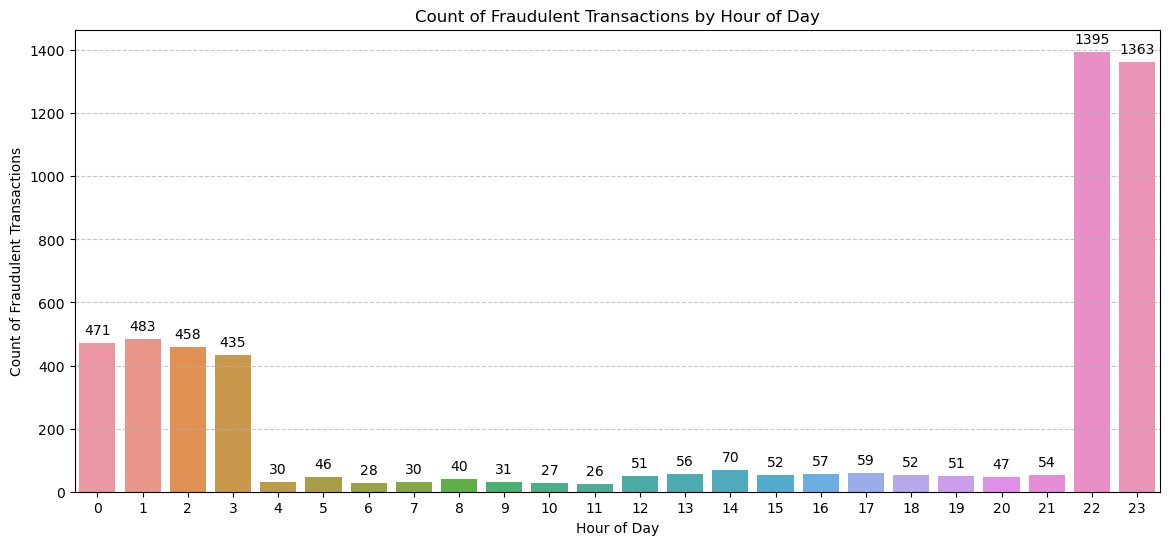

In [74]:
non_fraud_counts_by_hour = data[data['fraud'] == 0].groupby('transaction_hour').size().reset_index(name='count')

plt.figure(figsize=(15, 6))
count_plot_non_fraud = sns.barplot(x='transaction_hour', y='count', data=non_fraud_counts_by_hour)
plt.title('Count of Non-Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Non-Fraudulent Transactions')

# Adding the text on the bars for counts
for p in count_plot_non_fraud.patches:
    count_plot_non_fraud.annotate(format(p.get_height(), '.0f'), 
                                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                                  ha = 'center', va = 'center', 
                                  xytext = (0, 9), 
                                  textcoords = 'offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Recreating the bar plot with counts instead of proportions

# Calculating counts of fraudulent transactions by hour
fraud_counts_by_hour = data.groupby('transaction_hour').agg({'fraud': 'sum'}).reset_index()

plt.figure(figsize=(14, 6))
count_plot = sns.barplot(x='transaction_hour', y='fraud', data=fraud_counts_by_hour)
plt.title('Count of Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Fraudulent Transactions')

# Adding the text on the bars for counts
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [75]:
trans_freq_per_card = data.groupby('credit_card_number')['trans_date_trans_time_new'].count()
trans_freq_per_card.name = 'trans_freq_per_card'

In [76]:
avg_trans_amount_per_card = data.groupby('credit_card_number')['amount'].mean()
avg_trans_amount_per_card.name = 'avg_trans_amount_per_card'

In [77]:
data = data.merge(trans_freq_per_card, on='credit_card_number')
data = data.merge(avg_trans_amount_per_card, on='credit_card_number')

In [78]:
data[['credit_card_number','trans_freq_per_card', 'avg_trans_amount_per_card']].head(-5)

,credit_card_number,trans_freq_per_card,avg_trans_amount_per_card
0,4.750000e+12,2111,78.208247
1,4.750000e+12,2111,78.208247
2,4.750000e+12,2111,78.208247
3,4.750000e+12,2111,78.208247
4,4.750000e+12,2111,78.208247
...,...,...,...
975026,4.630000e+12,12,709.325833
975027,4.630000e+12,12,709.325833
975028,4.630000e+12,12,709.325833
975029,4.630000e+12,12,709.325833


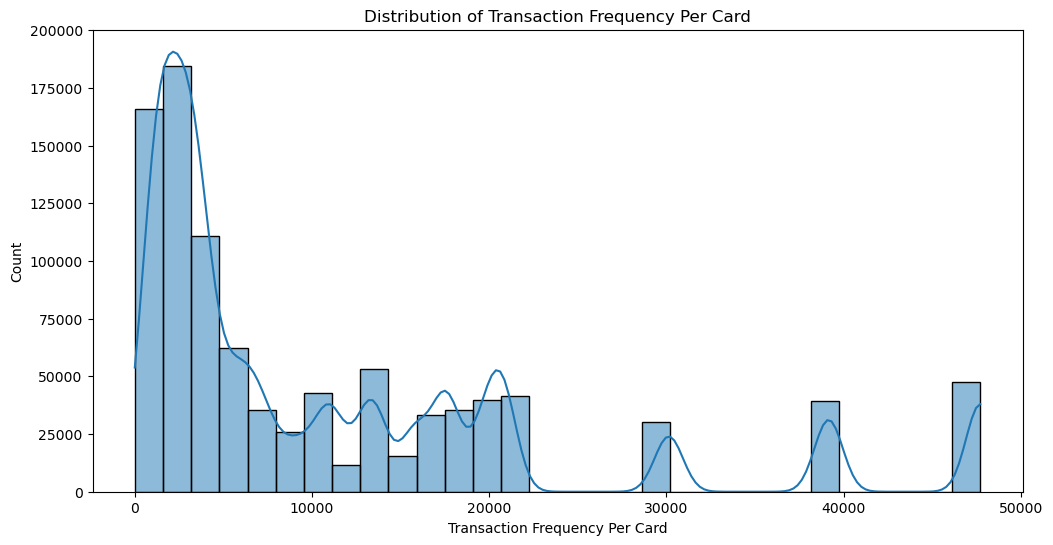

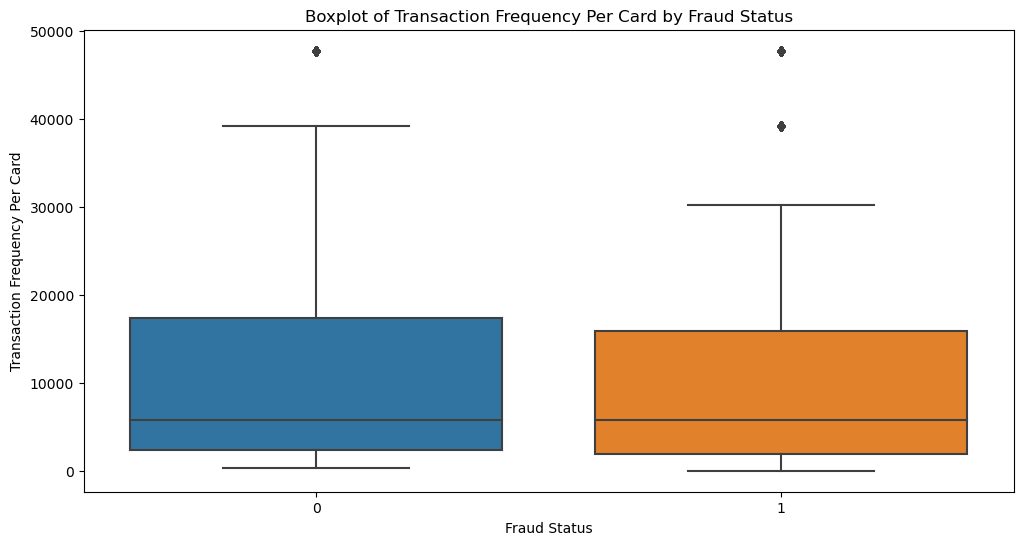

In [79]:

# Distribution of 'trans_freq_per_card'
plt.figure(figsize=(12, 6))
sns.histplot(data['trans_freq_per_card'], kde=True, bins=30)
plt.title('Distribution of Transaction Frequency Per Card')
plt.xlabel('Transaction Frequency Per Card')
plt.ylabel('Count')
plt.show()

# Boxplot for 'trans_freq_per_card' segmented by Fraud
plt.figure(figsize=(12, 6))
sns.boxplot(x='fraud', y='trans_freq_per_card', data=data)
plt.title('Boxplot of Transaction Frequency Per Card by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Transaction Frequency Per Card')
plt.show()

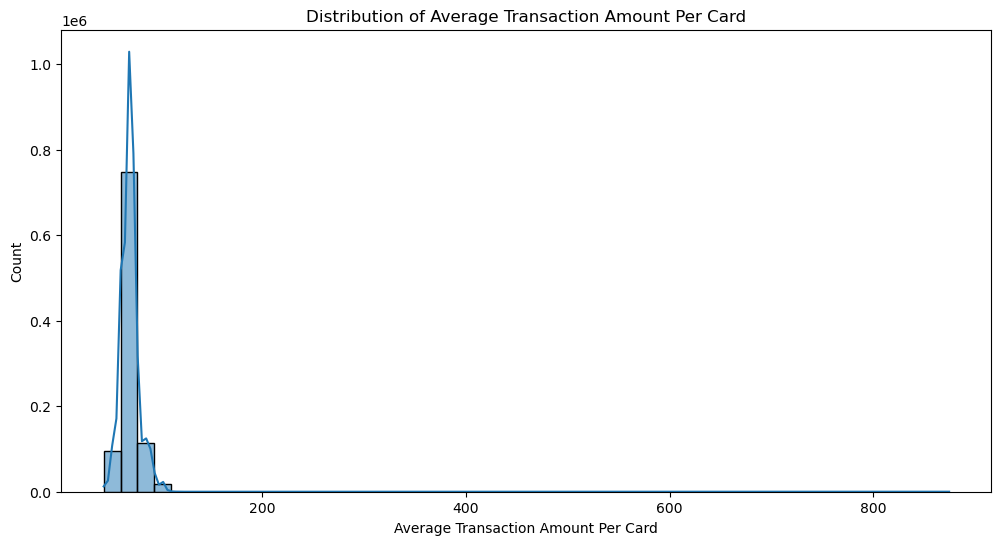

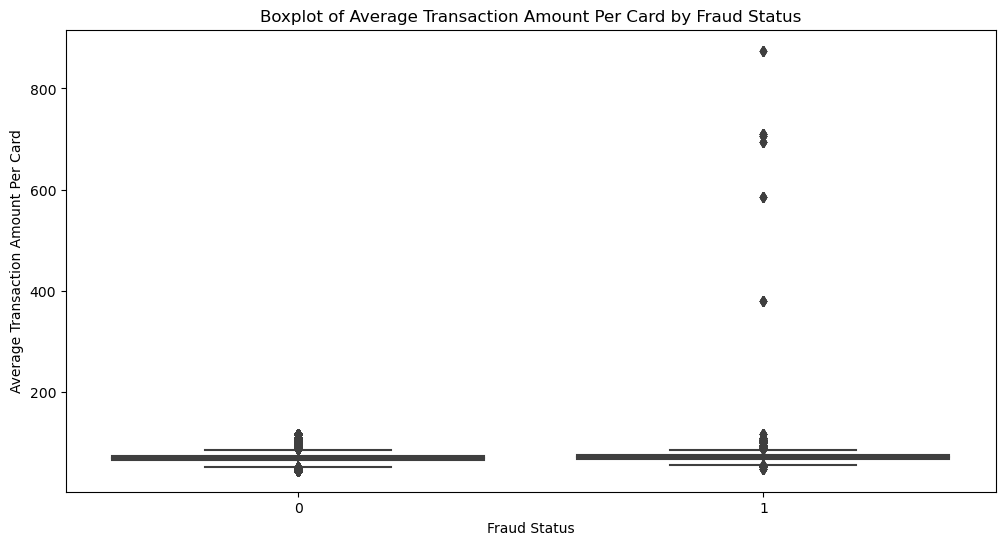

In [80]:
plt.figure(figsize=(12, 6))
sns.histplot(data['avg_trans_amount_per_card'], kde=True, bins=50)
plt.title('Distribution of Average Transaction Amount Per Card')
plt.xlabel('Average Transaction Amount Per Card')
plt.ylabel('Count')
plt.show()

# Boxplot for 'avg_trans_amount_per_card' segmented by Fraud
plt.figure(figsize=(12, 6))
sns.boxplot(x='fraud', y='avg_trans_amount_per_card', data=data)
plt.title('Boxplot of Average Transaction Amount Per Card by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Average Transaction Amount Per Card')
plt.show()

In [81]:
zip_code_fraud_rate = data.groupby('zip_code')['fraud'].mean()

# Categorize zip codes based on fraud rates
# Define thresholds for categorization (e.g., using quantiles)
lower_threshold = zip_code_fraud_rate.quantile(0.25)
upper_threshold = zip_code_fraud_rate.quantile(0.75)

def categorize_zip_code(fraud_rate):
    if fraud_rate > upper_threshold:
        return 'High Risk'
    elif fraud_rate > lower_threshold:
        return 'Medium Risk'
    else:
        return 'Low Risk'

# Apply categorization to each zip code
data['zip_code_risk'] = zip_code_fraud_rate.apply(categorize_zip_code)

# Map the risk categories back to the main dataset
data['zip_code_risk'] = data['zip_code'].map(data['zip_code_risk'])

# Display the first few rows of the updated dataset
print(data[['zip_code', 'zip_code_risk']].head())

# Mapping risk levels to numerical values
risk_mapping = {
    'Low Risk': 0,
    'Medium Risk': 1,
    'High Risk': 2
}

# Applying the mapping to the 'zip_code_risk' column
data['zip_code_risk_numerical'] = data['zip_code_risk'].map(risk_mapping)

# Displaying the updated dataset with the new 'zip_code_risk_numerical' column
data[['zip_code', 'zip_code_risk', 'zip_code_risk_numerical']].head()


   zip_code zip_code_risk
0     46346      Low Risk
1     46346      Low Risk
2     46346      Low Risk
3     46346      Low Risk
4     46346      Low Risk


,zip_code,zip_code_risk,zip_code_risk_numerical
0,46346,Low Risk,0
1,46346,Low Risk,0
2,46346,Low Risk,0
3,46346,Low Risk,0
4,46346,Low Risk,0


### Derived zip_code_risk_numerical

Absolute & Relative Frequency of zip_code_risk_numerical :


,Absolute Frequency,Relative Frequency(%)
zip_code_risk_numerical,,
0,428722,43.97
1,435389,44.65
2,110925,11.38


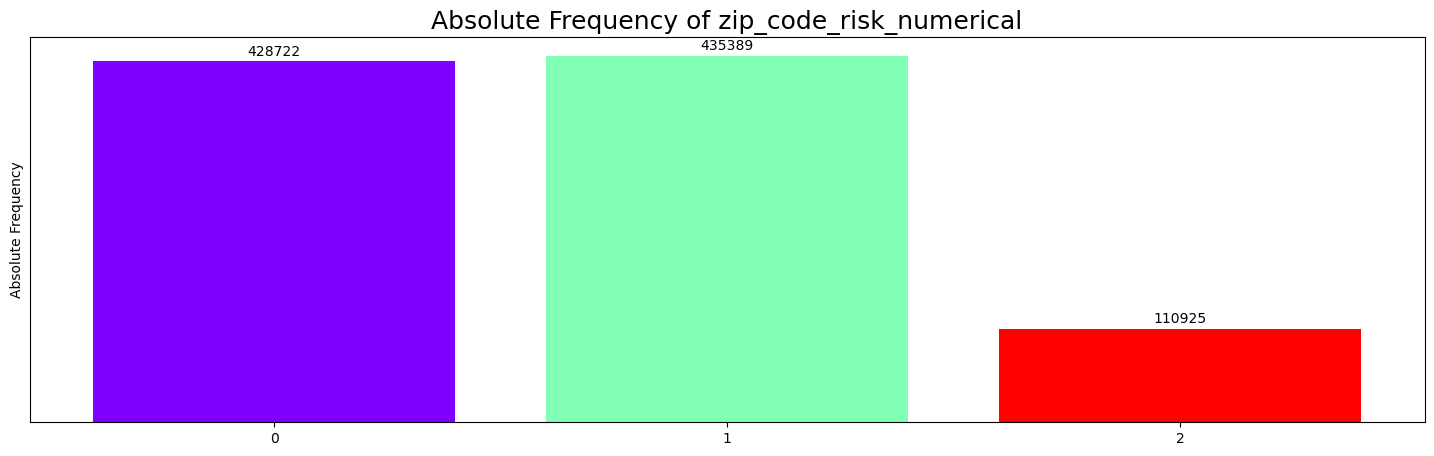

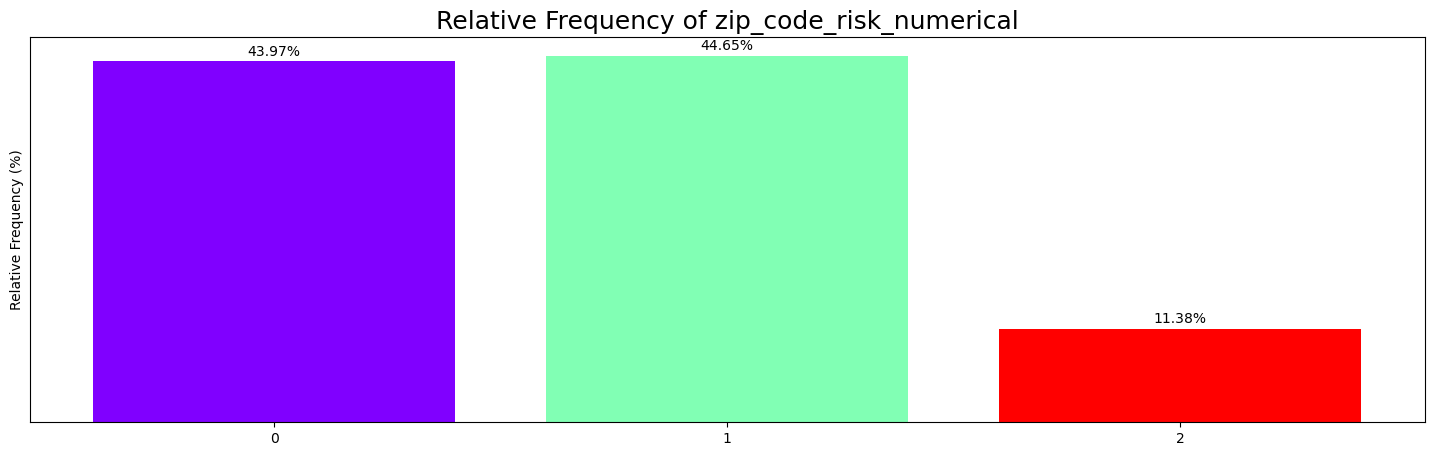

In [82]:
absolute_and_relative_freq1(data.zip_code_risk_numerical)

In [83]:
# Adding 'distance' feature using haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # radius of Earth in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance

data['distance'] = data.apply(lambda row: haversine_distance(row['latitude'], row['longitude'], row['merchant_lat'], row['merchant_long']), axis=1)




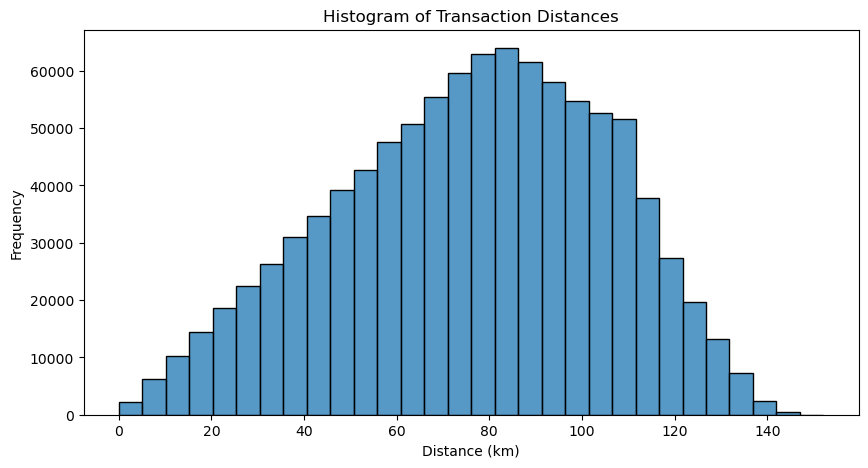

In [84]:
# Univariate analysis: Histogram of distances
plt.figure(figsize=(10, 5))
sns.histplot(data['distance'], kde=False, bins=30)
plt.title('Histogram of Transaction Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()


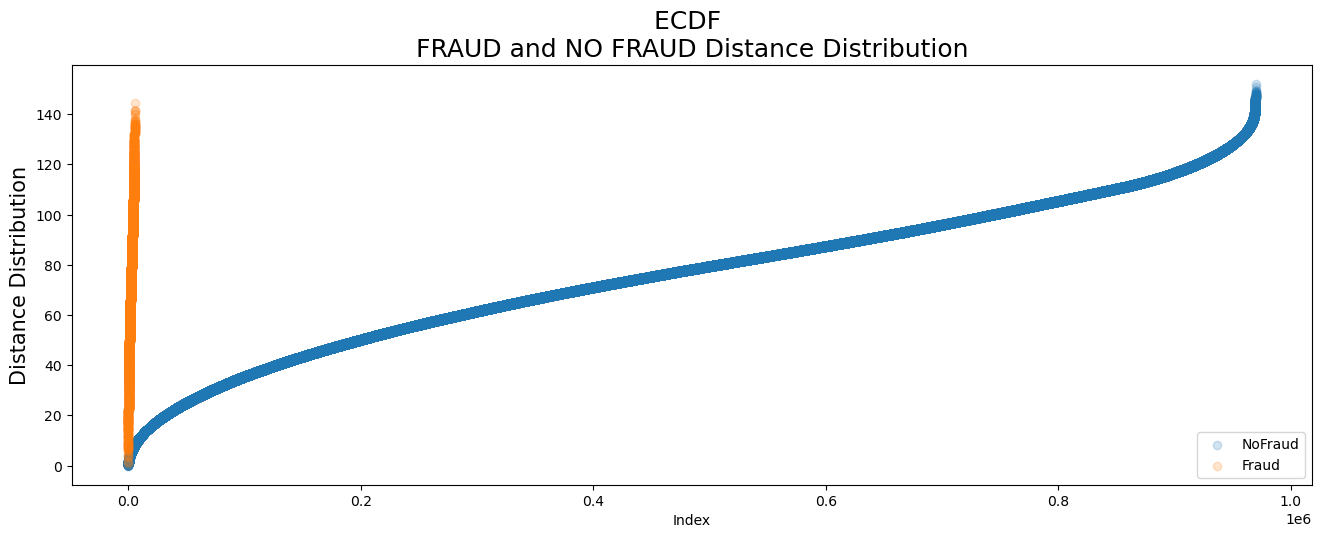

In [85]:
plt.figure(figsize=(16,12))


plt.subplot(212)
g4 = plt.scatter(range(data[data['fraud'] == 0].shape[0]),
                 np.sort(data[data['fraud'] == 0]['distance'].values), 
                 label='NoFraud', alpha=.2)
g4 = plt.scatter(range(data[data['fraud'] == 1].shape[0]),
                 np.sort(data[data['fraud'] == 1]['distance'].values), 
                 label='Fraud', alpha=.2)
g4= plt.title("ECDF \nFRAUD and NO FRAUD Distance Distribution", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("Distance Distribution", fontsize=15)
g4 = plt.legend()


In [86]:
data.head()

,trans_date_trans_time,credit_card_number,merchant,category,amount,first_name,last_name,gender,street,city,state,zip_code,latitude,longitude,city_population,job,day_of_birth,trans_number,unix_time,merchant_lat,merchant_long,fraud,transaction_hour,merchant_mean_enc,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_encoded,state_mean_enc,job_mean_enc,encoded_age,trans_date_trans_time_new,trans_freq_per_card,avg_trans_amount_per_card,zip_code_risk,zip_code_risk_numerical,distance
0,2021-02-01 00:02:00,4.750000e+12,fraud_Kling-Grant,grocery_net,19.46,Carrie,Washington,F,6114 Adams Harbor Suite 096,Kingsford Heights,IN,46346,41.4802,-86.6919,1423,"Psychologist, forensic",10/7/1998,0442179ed2d64942bc45c5442c3d5895,1328054544,41.587290,-87.582956,0,0,0.002837,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00396,0.004204,25,2021-02-01 00:02:00,2111,78.208247,Low Risk,0,75.118002
1,2021-02-01 18:47:00,4.750000e+12,fraud_Conroy-Emard,food_dining,29.31,Carrie,Washington,F,6114 Adams Harbor Suite 096,Kingsford Heights,IN,46346,41.4802,-86.6919,1423,"Psychologist, forensic",10/7/1998,ddc49414f1aba185cac4d74d2a3fc733,1328122046,41.675040,-87.559579,0,18,0.001491,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00396,0.004204,25,2021-02-01 18:47:00,2111,78.208247,Low Risk,0,75.354919
2,2021-02-02 02:35:00,4.750000e+12,"fraud_Greenholt, Jacobi and Gleason",gas_transport,44.36,Carrie,Washington,F,6114 Adams Harbor Suite 096,Kingsford Heights,IN,46346,41.4802,-86.6919,1423,"Psychologist, forensic",10/7/1998,183b40e594cb66140275191faf8858b3,1328150134,41.292636,-86.838630,0,2,0.005926,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00396,0.004204,25,2021-02-02 02:35:00,2111,78.208247,Low Risk,0,24.183124
3,2021-02-02 12:43:00,4.750000e+12,fraud_Hickle Group,shopping_pos,152.62,Carrie,Washington,F,6114 Adams Harbor Suite 096,Kingsford Heights,IN,46346,41.4802,-86.6919,1423,"Psychologist, forensic",10/7/1998,d9d03366a56304ab9e12b51dd833211b,1328186598,42.120498,-87.118712,0,12,0.004975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.00396,0.004204,25,2021-02-02 12:43:00,2111,78.208247,Low Risk,0,79.503513
4,2021-02-02 14:11:00,4.750000e+12,fraud_Abshire PLC,entertainment,91.95,Carrie,Washington,F,6114 Adams Harbor Suite 096,Kingsford Heights,IN,46346,41.4802,-86.6919,1423,"Psychologist, forensic",10/7/1998,7aab2d3dc6b11b246e28b2c5da889231,1328191893,41.239546,-85.999982,0,14,0.005618,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00396,0.004204,25,2021-02-02 14:11:00,2111,78.208247,Low Risk,0,63.645974


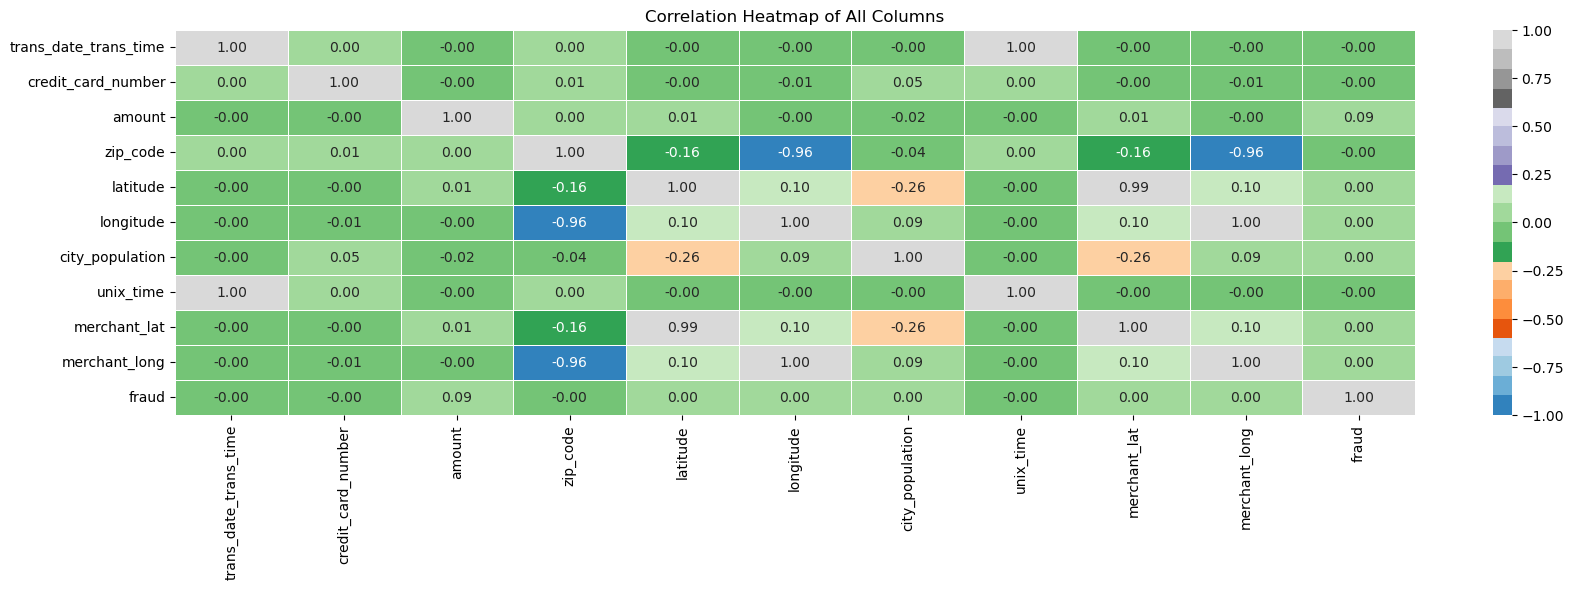

In [87]:
plt.figure(figsize = (20,5))
sns.heatmap(data.drop(columns=['merchant','category','first_name','last_name','gender','street','city','job','state','day_of_birth'
                              ,'trans_number','merchant_mean_enc','category_entertainment','category_food_dining','category_gas_transport','category_grocery_net','category_grocery_pos',
'category_health_fitness','category_home','category_kids_pets','category_misc_net','category_misc_pos','category_personal_care','category_shopping_net',
'category_shopping_pos','category_travel','transaction_hour','gender_encoded','state_mean_enc','job_mean_enc','zip_code_risk','zip_code_risk_numerical',
'encoded_age','trans_date_trans_time_new','trans_freq_per_card','avg_trans_amount_per_card','distance']).corr(method='spearman'), annot = True, cmap="tab20c", fmt=".2f", vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Correlation Heatmap of All Columns')
plt.show()

In [88]:
data_numerical=data.drop(columns=['trans_date_trans_time','trans_date_trans_time_new','credit_card_number','merchant','category','first_name',
 'last_name','gender','street','city','state','zip_code','job','day_of_birth','trans_number','unix_time','zip_code_risk'])


### Final Dataset columns before Tomek

In [89]:
# Rearrange the columns so that 'fraud' is the last column
cols = [col for col in data_numerical.columns if col != 'fraud'] + ['fraud']
data_numerical = data_numerical[cols]

## Tomek Implementation

In [90]:
data_numerical.head()

,amount,latitude,longitude,city_population,merchant_lat,merchant_long,transaction_hour,merchant_mean_enc,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_encoded,state_mean_enc,job_mean_enc,encoded_age,trans_freq_per_card,avg_trans_amount_per_card,zip_code_risk_numerical,distance,fraud
0,19.46,41.4802,-86.6919,1423,41.587290,-87.582956,0,0.002837,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00396,0.004204,25,2111,78.208247,0,75.118002,0
1,29.31,41.4802,-86.6919,1423,41.675040,-87.559579,18,0.001491,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00396,0.004204,25,2111,78.208247,0,75.354919,0
2,44.36,41.4802,-86.6919,1423,41.292636,-86.838630,2,0.005926,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00396,0.004204,25,2111,78.208247,0,24.183124,0
3,152.62,41.4802,-86.6919,1423,42.120498,-87.118712,12,0.004975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.00396,0.004204,25,2111,78.208247,0,79.503513,0
4,91.95,41.4802,-86.6919,1423,41.239546,-85.999982,14,0.005618,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00396,0.004204,25,2111,78.208247,0,63.645974,0


In [91]:
from imblearn.under_sampling import TomekLinks

In [92]:
X = data_numerical.drop(['fraud'], axis=1)
y = data_numerical['fraud']

In [93]:
tomek = TomekLinks(sampling_strategy='majority')
X_tomek, y_tomek = tomek.fit_resample(X, y)

In [94]:
combined_data = pd.concat([X_tomek, y_tomek], axis=1)
combined_data.head()

,amount,latitude,longitude,city_population,merchant_lat,merchant_long,transaction_hour,merchant_mean_enc,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_encoded,state_mean_enc,job_mean_enc,encoded_age,trans_freq_per_card,avg_trans_amount_per_card,zip_code_risk_numerical,distance,fraud
0,19.46,41.4802,-86.6919,1423,41.587290,-87.582956,0,0.002837,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00396,0.004204,25,2111,78.208247,0,75.118002,0
1,29.31,41.4802,-86.6919,1423,41.675040,-87.559579,18,0.001491,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00396,0.004204,25,2111,78.208247,0,75.354919,0
2,44.36,41.4802,-86.6919,1423,41.292636,-86.838630,2,0.005926,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00396,0.004204,25,2111,78.208247,0,24.183124,0
3,152.62,41.4802,-86.6919,1423,42.120498,-87.118712,12,0.004975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.00396,0.004204,25,2111,78.208247,0,79.503513,0
4,91.95,41.4802,-86.6919,1423,41.239546,-85.999982,14,0.005618,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00396,0.004204,25,2111,78.208247,0,63.645974,0


# Correlation Matrix After Feature Engineering

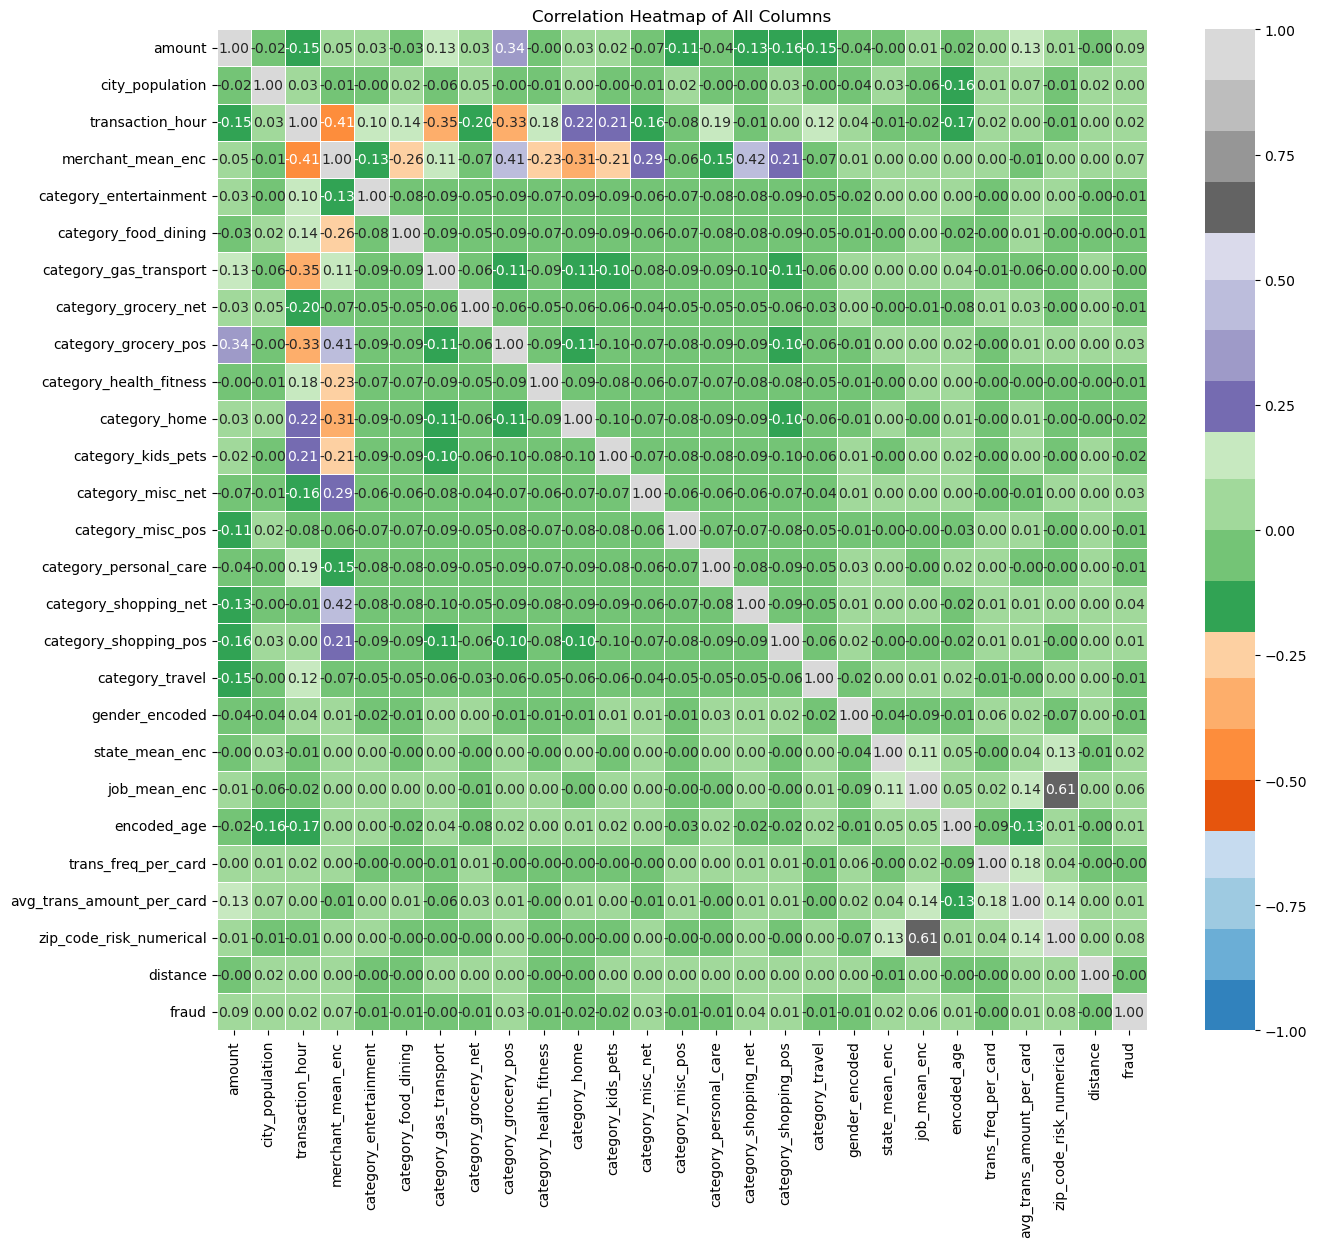

In [95]:
plt.figure(figsize = (15,13))
sns.heatmap(combined_data.drop(columns=['latitude','longitude','merchant_lat','merchant_long']).corr(method='spearman'), annot = True, cmap="tab20c", fmt=".2f", vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Correlation Heatmap of All Columns')
plt.show()

## EDA After Tomek

## Feature 1: trans_date_trans_time'

Absolute & Relative Frequency of transaction_hour :


,Absolute Frequency,Relative Frequency(%)
transaction_hour,,
0,31899,3.28
1,32274,3.31
2,31885,3.27
3,32048,3.29
4,31505,3.24
5,31624,3.25
6,31793,3.27
7,31693,3.26
8,31812,3.27


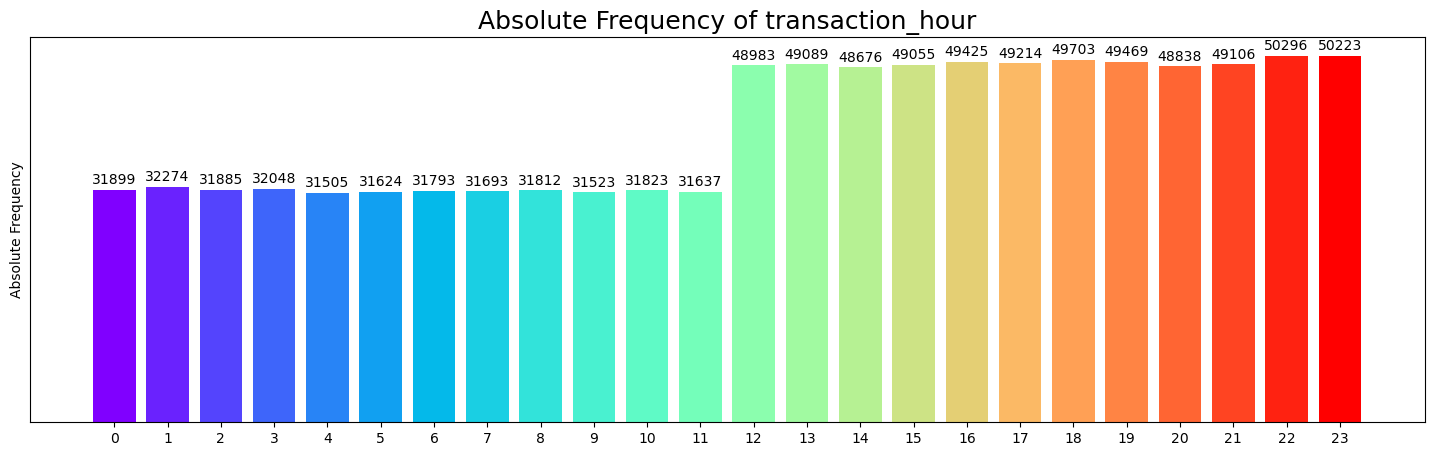

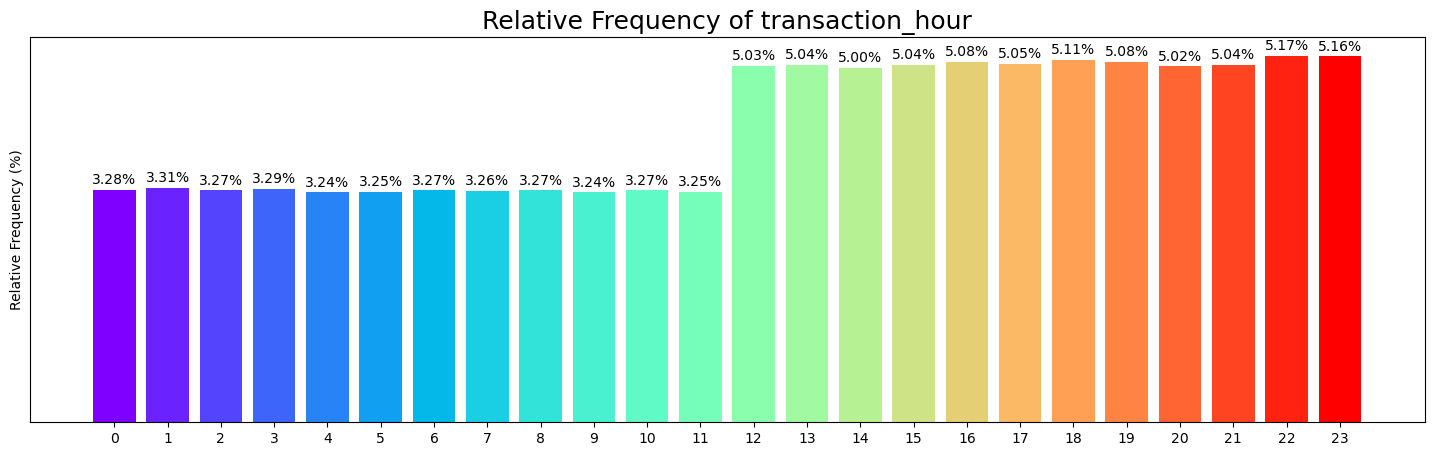

In [96]:
absolute_and_relative_freq1(combined_data.transaction_hour)

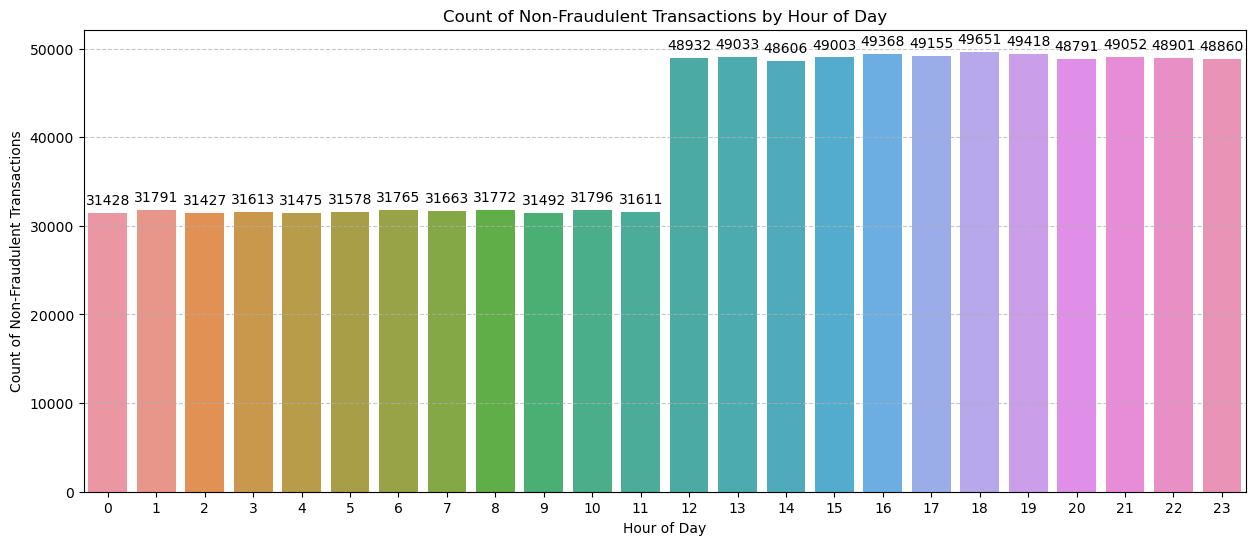

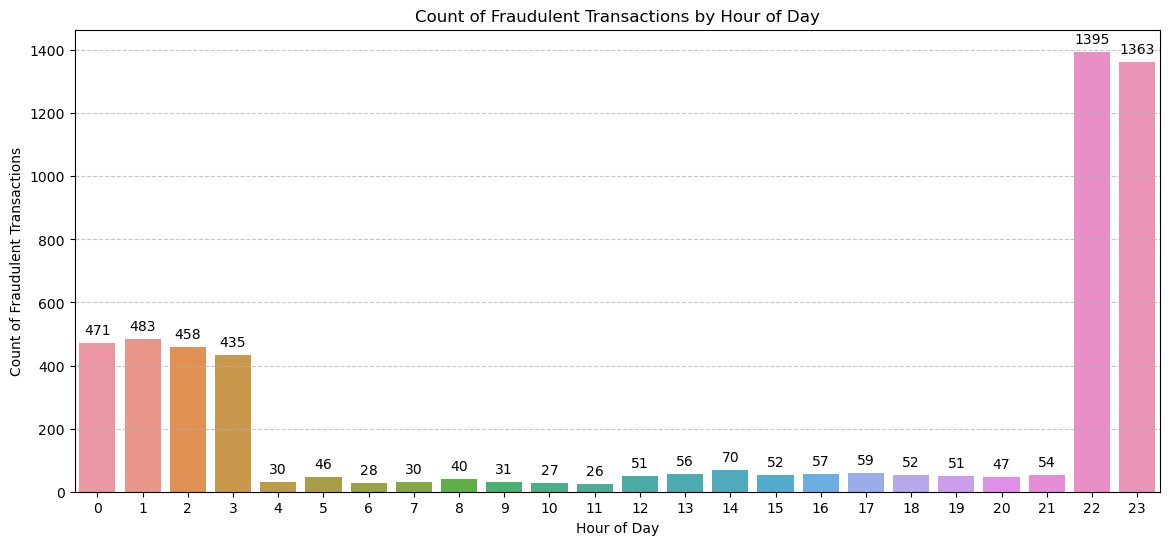

In [97]:
non_fraud_counts_by_hour = combined_data[combined_data['fraud'] == 0].groupby('transaction_hour').size().reset_index(name='count')

plt.figure(figsize=(15, 6))
count_plot_non_fraud = sns.barplot(x='transaction_hour', y='count', data=non_fraud_counts_by_hour)
plt.title('Count of Non-Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Non-Fraudulent Transactions')

# Adding the text on the bars for counts
for p in count_plot_non_fraud.patches:
    count_plot_non_fraud.annotate(format(p.get_height(), '.0f'), 
                                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                                  ha = 'center', va = 'center', 
                                  xytext = (0, 9), 
                                  textcoords = 'offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Recreating the bar plot with counts instead of proportions

# Calculating counts of fraudulent transactions by hour
fraud_counts_by_hour = combined_data.groupby('transaction_hour').agg({'fraud': 'sum'}).reset_index()

plt.figure(figsize=(14, 6))
count_plot = sns.barplot(x='transaction_hour', y='fraud', data=fraud_counts_by_hour)
plt.title('Count of Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Fraudulent Transactions')

# Adding the text on the bars for counts
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Feature 3: Merchant

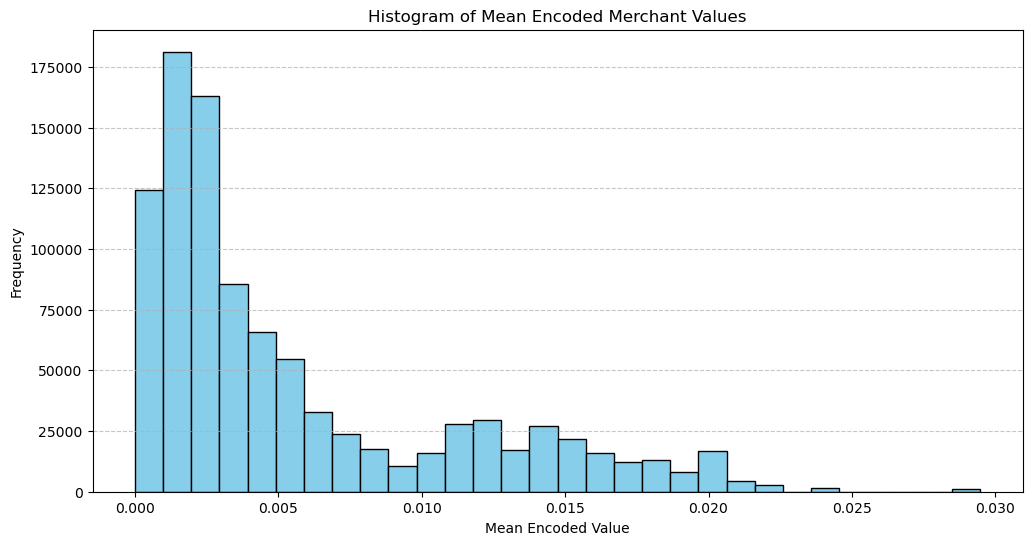

In [98]:
plt.figure(figsize=(12, 6))
hist_plot= plt.hist(combined_data['merchant_mean_enc'], bins=30, edgecolor='black', color='skyblue')
plt.title('Histogram of Mean Encoded Merchant Values')
plt.xlabel('Mean Encoded Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Feature 5: Amount

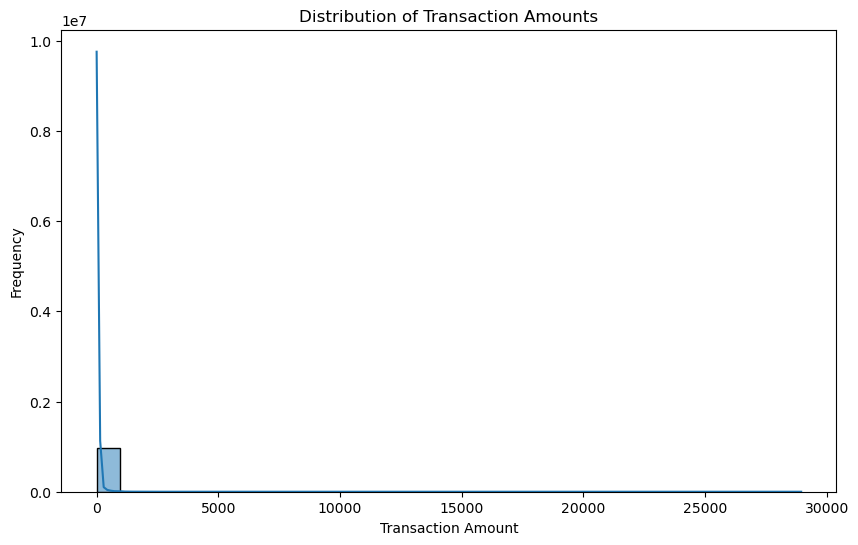

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['amount'], kde=True, bins = 30)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Probability')

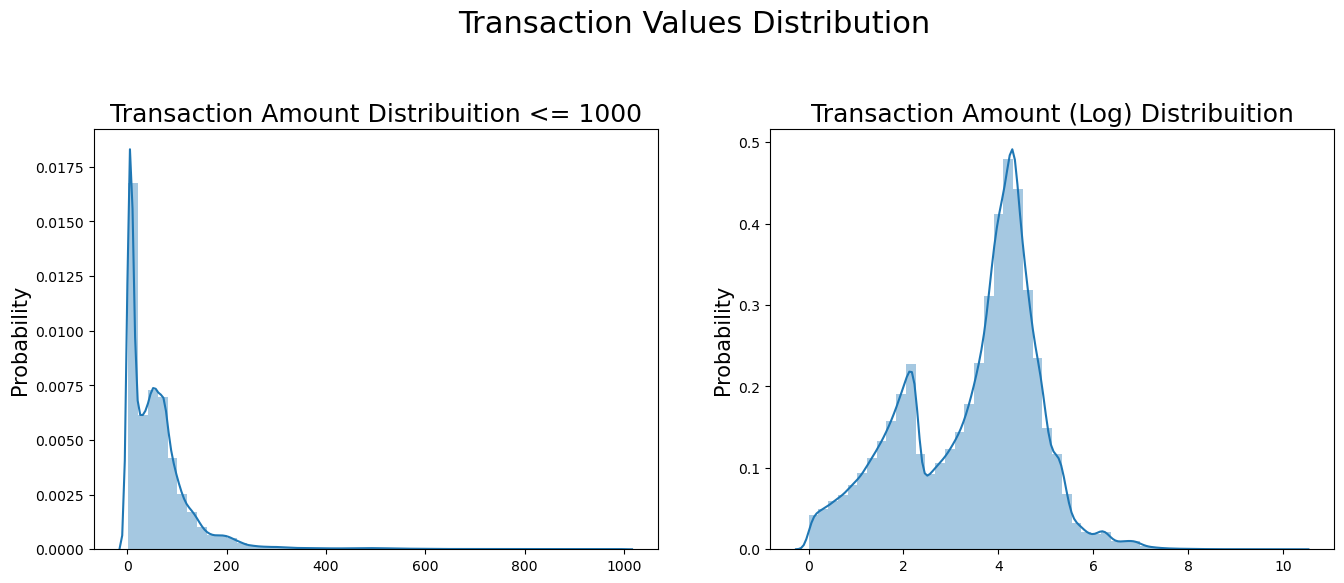

In [100]:
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
g = sns.distplot(combined_data[combined_data['amount'] <= 1000]['amount'])
g.set_title("Transaction Amount Distribuition <= 1000", fontsize=18)
g.set_xlabel("")
g.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
g1 = sns.distplot(np.log(combined_data['amount']))
g1.set_title("Transaction Amount (Log) Distribuition", fontsize=18)
g1.set_xlabel("")
g1.set_ylabel("Probability", fontsize=15)

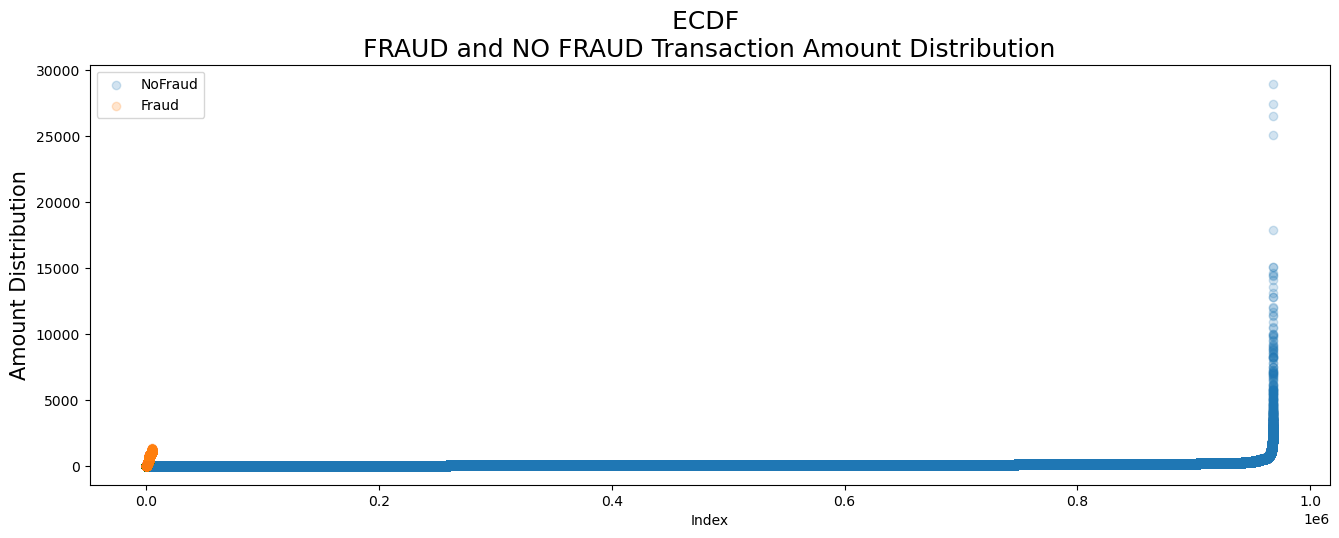

In [101]:
plt.figure(figsize=(16,12))


plt.subplot(212)
g4 = plt.scatter(range(combined_data[combined_data['fraud'] == 0].shape[0]),
                 np.sort(combined_data[combined_data['fraud'] == 0]['amount'].values), 
                 label='NoFraud', alpha=.2)
g4 = plt.scatter(range(combined_data[combined_data['fraud'] == 1].shape[0]),
                 np.sort(combined_data[combined_data['fraud'] == 1]['amount'].values), 
                 label='Fraud', alpha=.2)
g4= plt.title("ECDF \nFRAUD and NO FRAUD Transaction Amount Distribution", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("Amount Distribution", fontsize=15)
g4 = plt.legend()


### Feature 8: Gender

Absolute & Relative Frequency of gender_encoded :


,Absolute Frequency,Relative Frequency(%)
gender_encoded,,
1,532759,54.72
0,440834,45.28


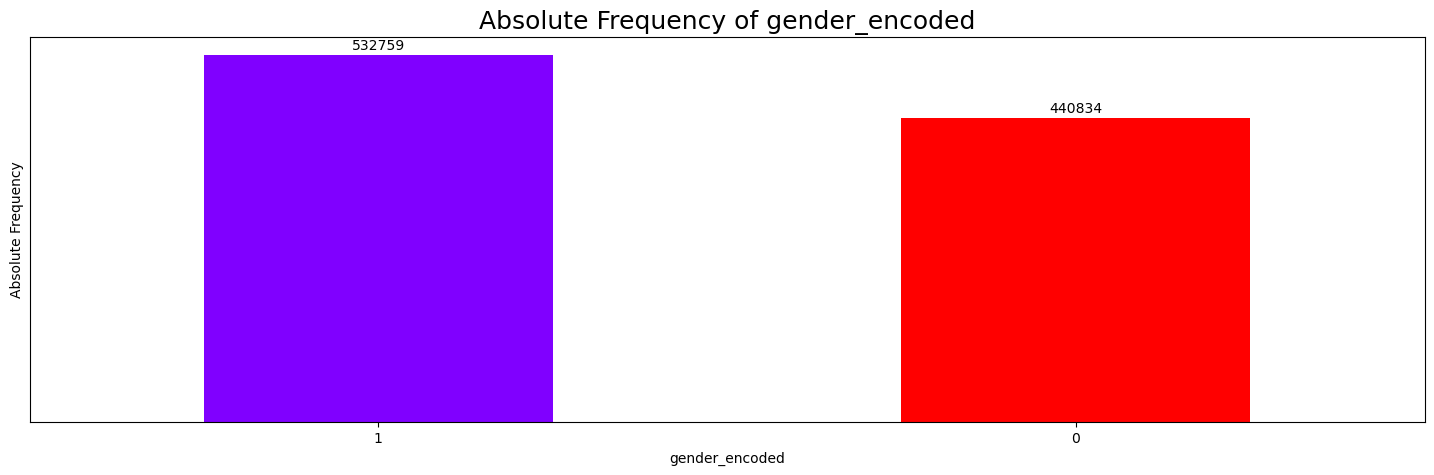

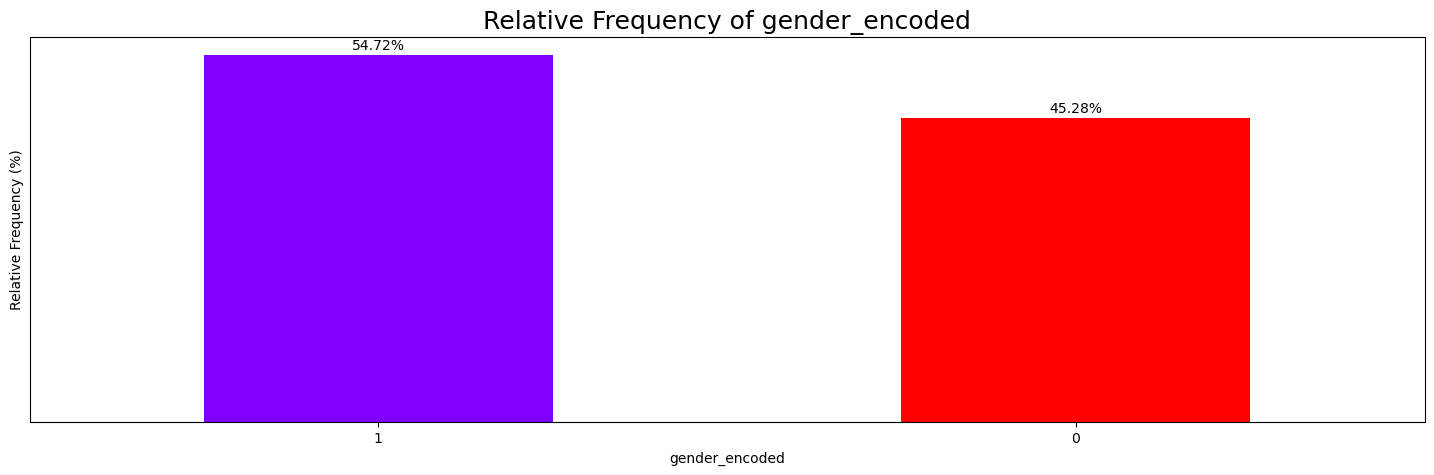

In [102]:
# Univariate plot of the 'gender' column
absolute_and_relative_freq(combined_data.gender_encoded)

**Percentage Count of Gender by Fraud(0 or 1):**

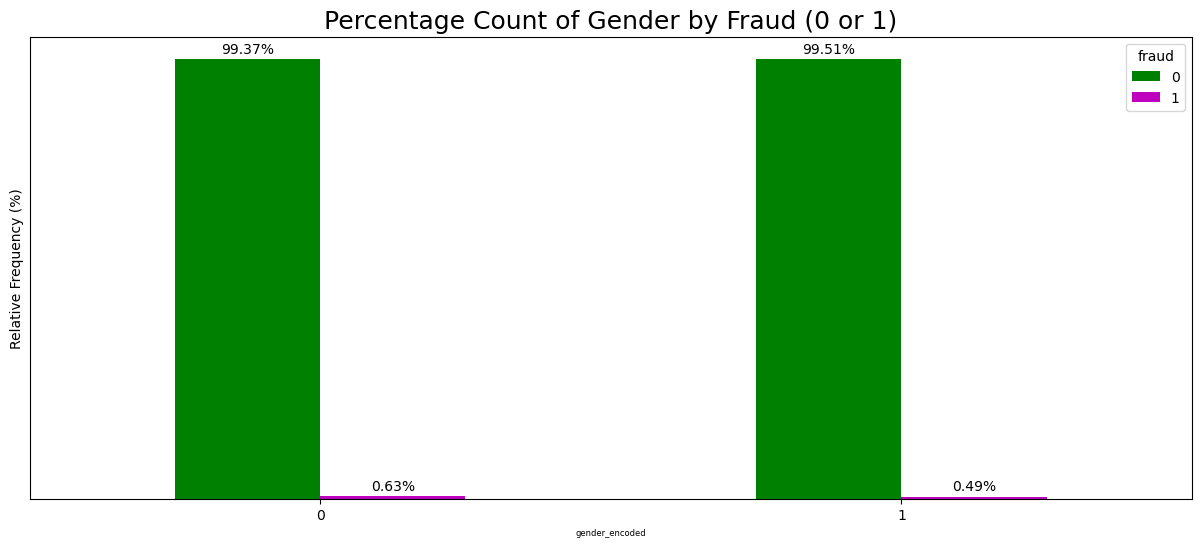

In [103]:


'''Plot the binary variables in relative scale'''

bold('**Percentage Count of Gender by Fraud(0 or 1):**')
crosstab1(combined_data.gender_encoded, combined_data.fraud, color = ['g', 'm'])

### Feature 11: State

### Feature 12: Zip Code

Absolute & Relative Frequency of zip_code_risk_numerical :


,Absolute Frequency,Relative Frequency(%)
zip_code_risk_numerical,,
1,434468,44.63
0,428703,44.03
2,110422,11.34


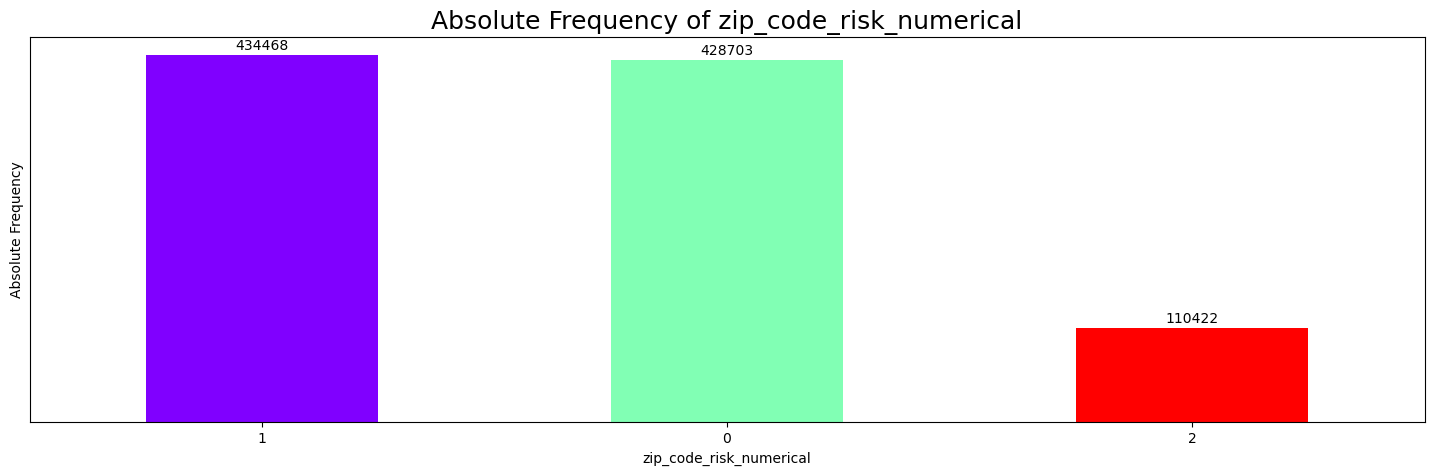

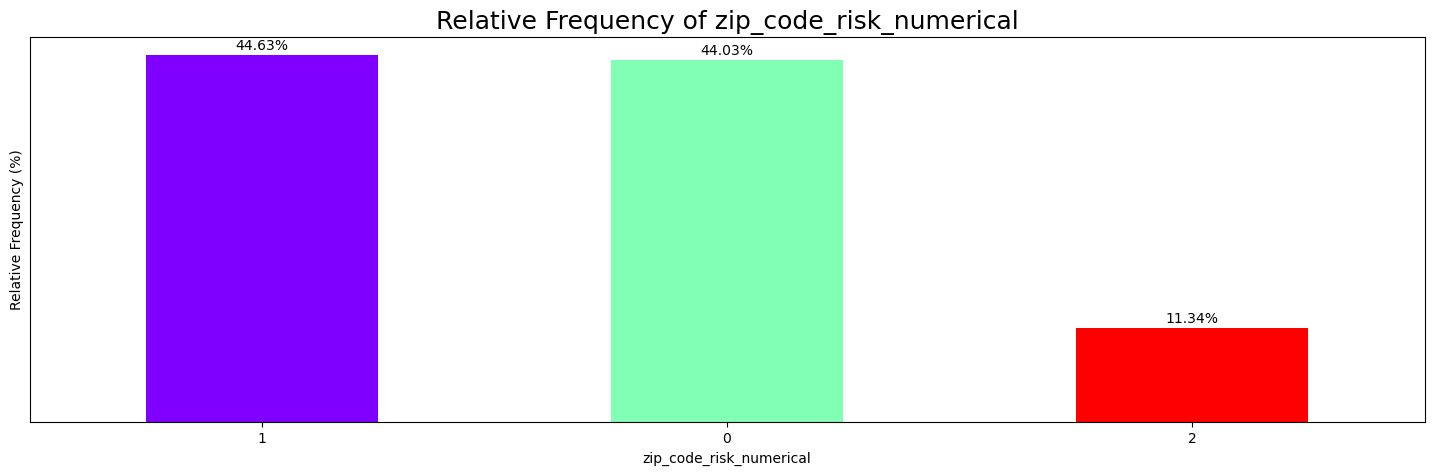

In [104]:
absolute_and_relative_freq(combined_data.zip_code_risk_numerical)

### Feature 15: City Population

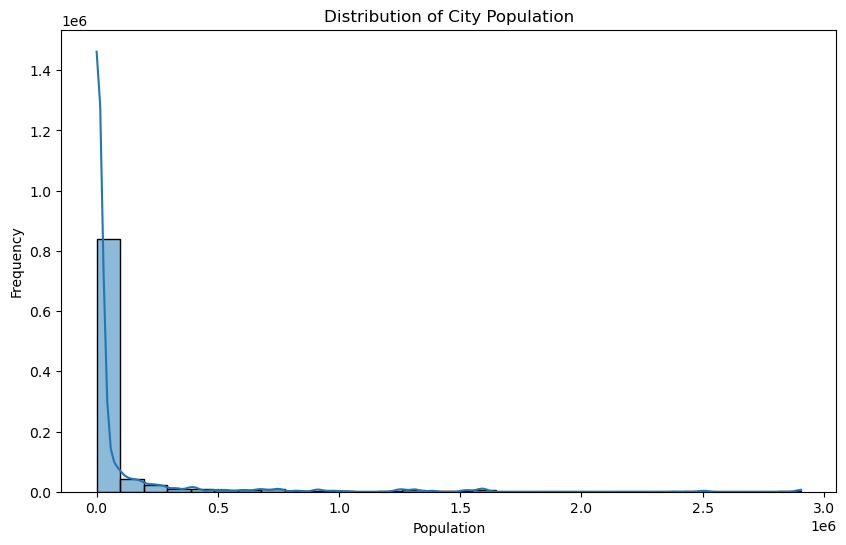

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['city_population'], kde=True, bins=30)
plt.title('Distribution of City Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Probability')

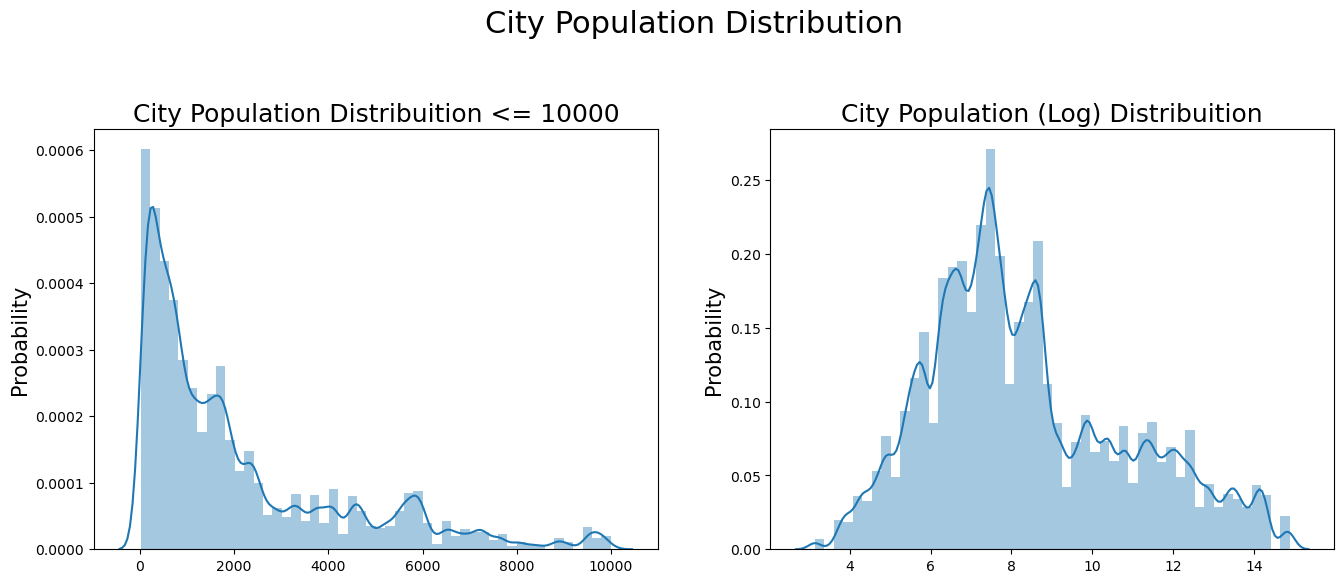

In [106]:
plt.figure(figsize=(16,12))
plt.suptitle('City Population Distribution', fontsize=22)
plt.subplot(221)
g = sns.distplot(combined_data[combined_data['city_population'] <= 10000]['city_population'])
g.set_title("City Population Distribuition <= 10000", fontsize=18)
g.set_xlabel("")
g.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
g1 = sns.distplot(np.log(combined_data['city_population']))
g1.set_title("City Population (Log) Distribuition", fontsize=18)
g1.set_xlabel("")
g1.set_ylabel("Probability", fontsize=15)

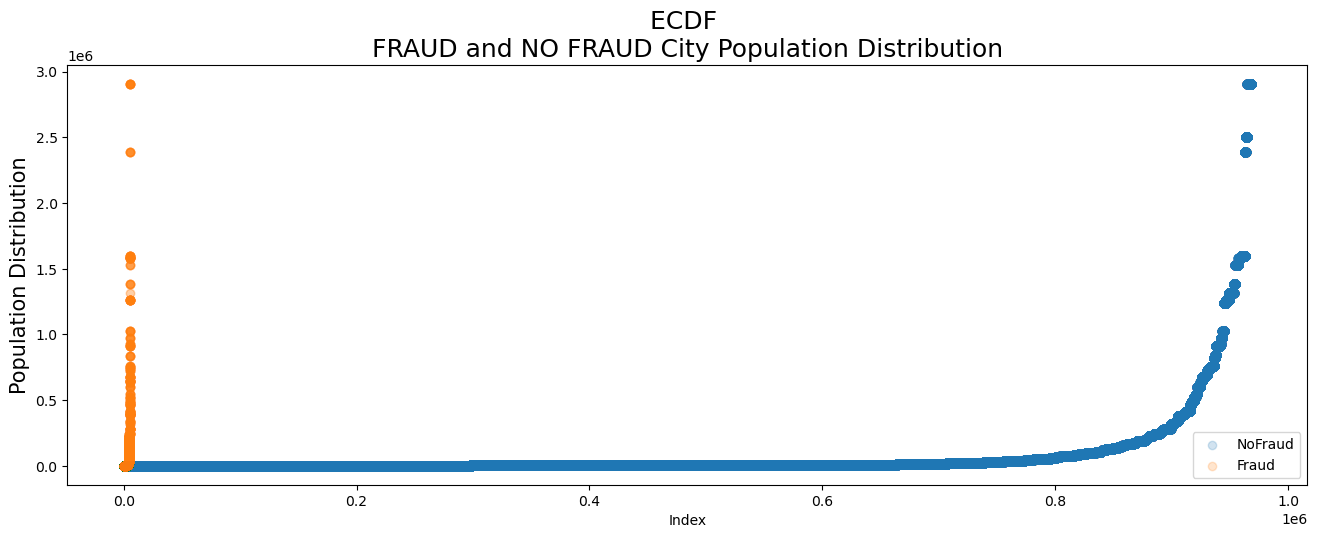

In [107]:
plt.figure(figsize=(16,12))


plt.subplot(212)
g4 = plt.scatter(range(combined_data[combined_data['fraud'] == 0].shape[0]),
                 np.sort(combined_data[combined_data['fraud'] == 0]['city_population'].values), 
                 label='NoFraud', alpha=.2)
g4 = plt.scatter(range(combined_data[combined_data['fraud'] == 1].shape[0]),
                 np.sort(combined_data[combined_data['fraud'] == 1]['city_population'].values), 
                 label='Fraud', alpha=.2)
g4= plt.title("ECDF \nFRAUD and NO FRAUD City Population Distribution", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("Population Distribution", fontsize=15)
g4 = plt.legend()


### Feature 17: Day of Birth

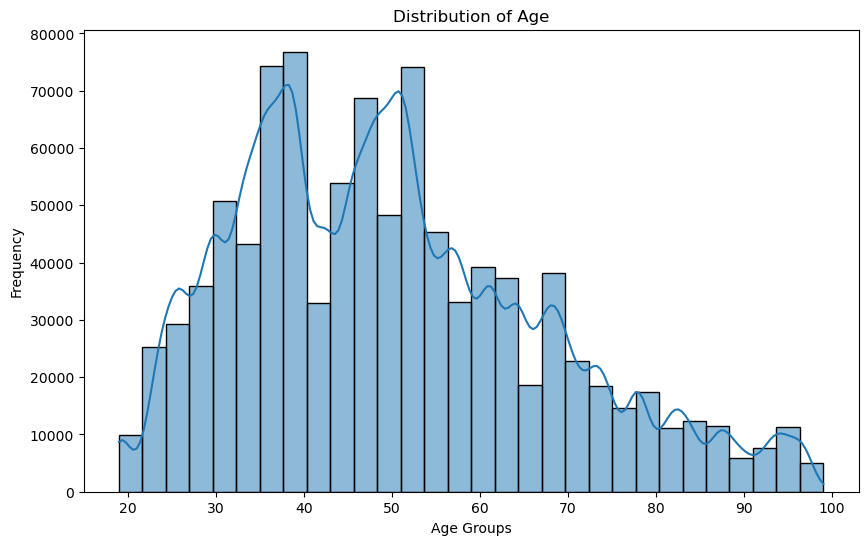

In [108]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['encoded_age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.show()

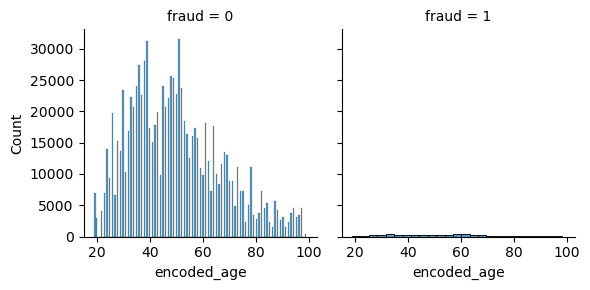

In [109]:
g = sns.FacetGrid(combined_data, col='fraud')
g.map(sns.histplot, 'encoded_age')

### Feature 22: Fraud

Absolute & Relative Frequency of fraud :


,Absolute Frequency,Relative Frequency(%)
fraud,,
0,968181,99.44
1,5412,0.56


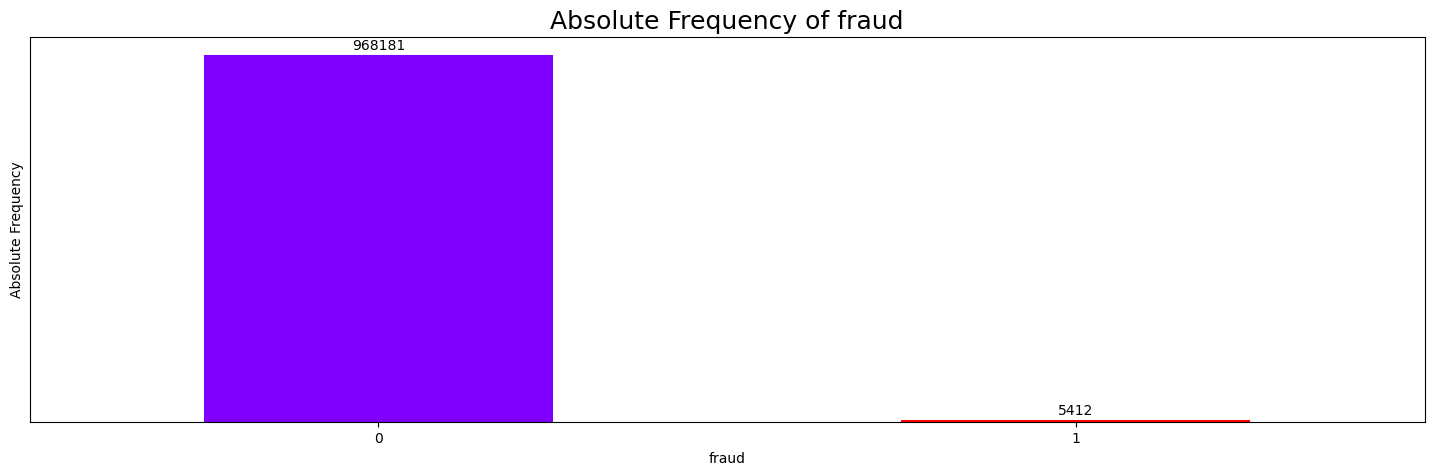

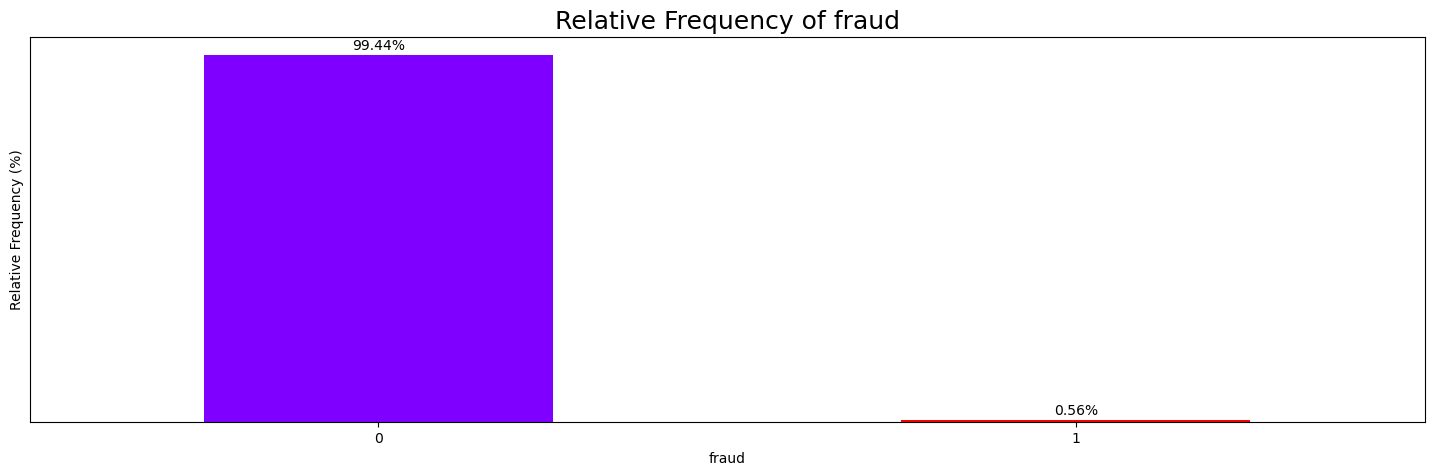

In [110]:
'''Plot and count the target variable in absolute and relative scale'''
absolute_and_relative_freq(combined_data.fraud)

## Feature Distance

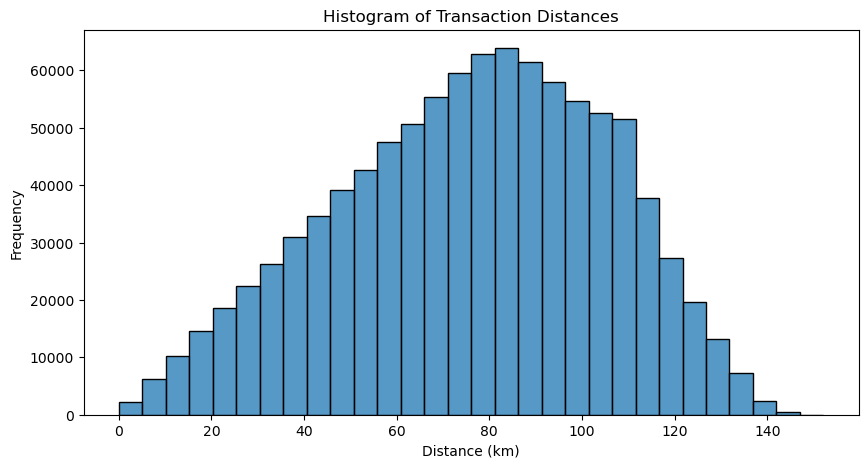

In [111]:
# Univariate analysis: Histogram of distances
plt.figure(figsize=(10, 5))
sns.histplot(combined_data['distance'], kde=False, bins=30)
plt.title('Histogram of Transaction Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

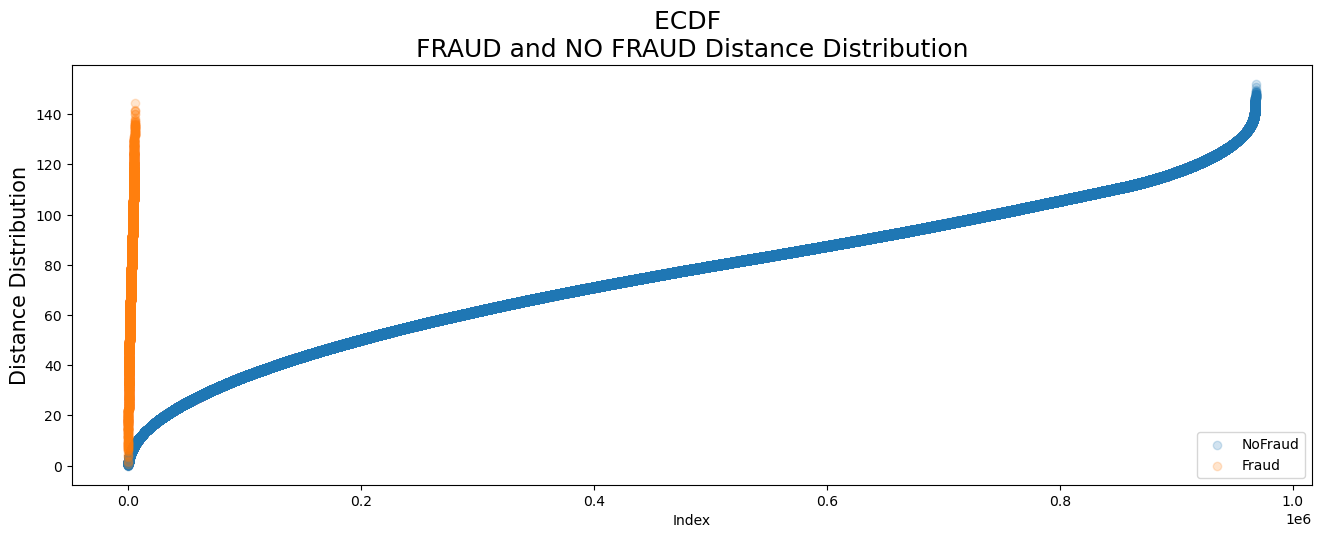

In [112]:
plt.figure(figsize=(16,12))


plt.subplot(212)
g4 = plt.scatter(range(combined_data[combined_data['fraud'] == 0].shape[0]),
                 np.sort(combined_data[combined_data['fraud'] == 0]['distance'].values), 
                 label='NoFraud', alpha=.2)
g4 = plt.scatter(range(combined_data[combined_data['fraud'] == 1].shape[0]),
                 np.sort(combined_data[combined_data['fraud'] == 1]['distance'].values), 
                 label='Fraud', alpha=.2)
g4= plt.title("ECDF \nFRAUD and NO FRAUD Distance Distribution", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("Distance Distribution", fontsize=15)
g4 = plt.legend()


### Logistic Regression

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
# Assuming 'combined_data' is your DataFrame after applying Tomek
X = combined_data.drop(['fraud'], axis=1)  # Features
y = combined_data['fraud']  # Target variable

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a logistic regression model
logistic_model = LogisticRegression()

# Fitting the model to the training set
logistic_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logistic_model.predict(X_test)


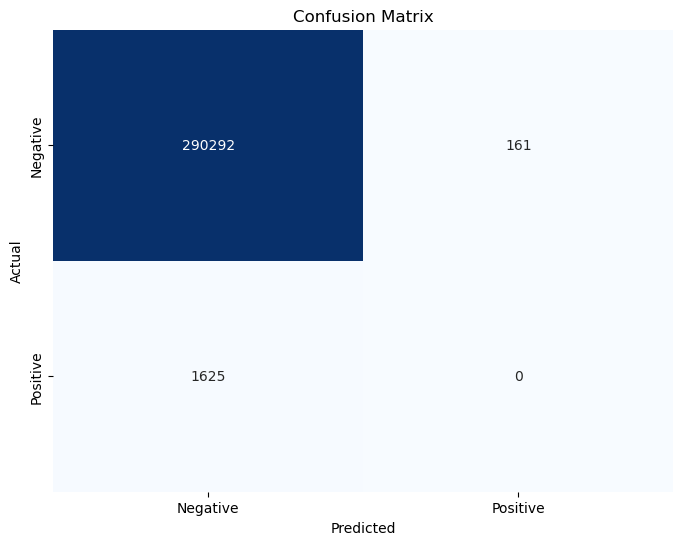

In [115]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

tp = cm[0, 0]
tn = cm[1, 1]
fp = cm[0, 1]
fn = cm[1, 0]

# Displaying the Confusion Matrix if specified
if confusion_matrix:
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        xticklabels=["Negative", "Positive"],
        yticklabels=["Negative", "Positive"],
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

Tomek_logit_Recall = recall_score(y_test, y_pred)
Tomek_logit_Precision = precision_score(y_test, y_pred)
Tomek_logit_f1 = f1_score(y_test, y_pred)
Tomek_logit_accuracy = accuracy_score(y_test, y_pred)


In [116]:
ndf = [(Tomek_logit_Recall, Tomek_logit_Precision, Tomek_logit_f1, Tomek_logit_accuracy)]

Tomek_logit_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
Tomek_logit_score.insert(0, 'Logistic Regression combined with', 'Tomek')
Tomek_logit_score

,Logistic Regression combined with,Recall,Precision,F1 Score,Accuracy
0,Tomek,0.0,0.0,0.0,0.993885


## AUC-ROC Curve

In [117]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for Tomek: {ROCAUCscore:.4f}")

AUC-ROC Curve for Tomek: 0.4997


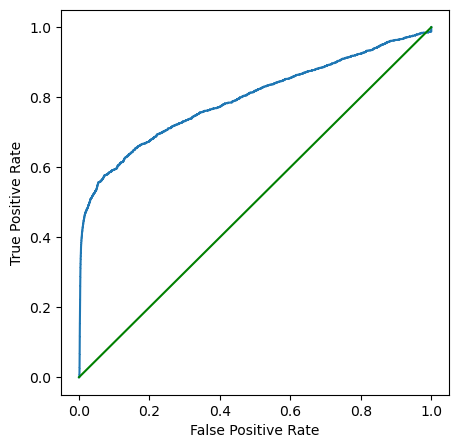

In [118]:
y_proba = logistic_model.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])

## Precision-Recall Curve (PR curve)

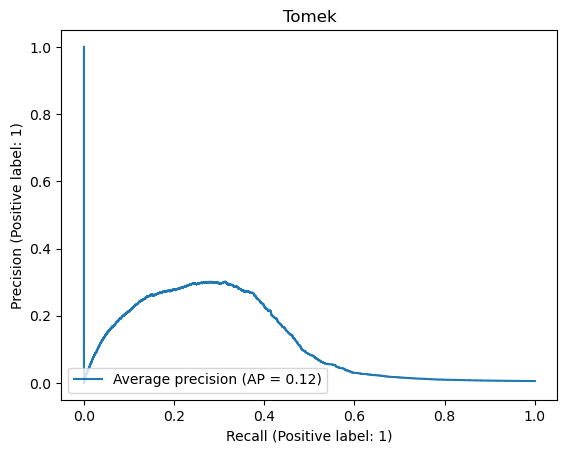

In [119]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    logistic_model, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Tomek")

In [120]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    290453
           1       0.00      0.00      0.00      1625

    accuracy                           0.99    292078
   macro avg       0.50      0.50      0.50    292078
weighted avg       0.99      0.99      0.99    292078



### Hyper Parameter Tuning

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

# Define the parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use in the optimization problem
}

# Custom scoring function
def custom_scorer(y_test, y_pred):
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    # Example: Harmonic mean of recall and precision (F1 Score)
    # You can modify this formula as needed
    return 2 * (precision * recall) / (precision + recall)

# Make a scorer from the custom scoring function
custom_score = make_scorer(custom_scorer)

# Listing the scoring metrics
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score),
    'custom_score': custom_score,
}


# Create a logistic regression model
logistic_model_tuned = LogisticRegression()

# Create GridSearchCV
grid_search_logit = GridSearchCV(estimator=logistic_model_tuned, param_grid=param_grid, cv=5, scoring=scoring, refit='f1', verbose=3)

# Fit GridSearchCV to the training data
grid_search_logit.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Score:", grid_search_logit.best_score_)

print('Best Parameters:', grid_search_logit.best_params_)

for metric in ['precision', 'recall', 'f1', 'accuracy']:
    print(f"Mean {metric} score: {grid_search_logit.cv_results_['mean_test_' + metric][grid_search_logit.best_index_]}")


Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=newton-cg; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=newton-cg; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=newton-cg; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=newton-cg; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=lbfgs; accuracy: (test=nan) cust

[CV 3/5] END C=0.001, penalty=l2, solver=saga; accuracy: (test=0.994) custom_score: (test=nan) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) total time=  40.6s
[CV 4/5] END C=0.001, penalty=l2, solver=saga; accuracy: (test=0.994) custom_score: (test=nan) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) total time=  41.5s
[CV 5/5] END C=0.001, penalty=l2, solver=saga; accuracy: (test=0.994) custom_score: (test=nan) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) total time=  40.5s
[CV 1/5] END C=0.001, penalty=elasticnet, solver=newton-cg; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 2/5] END C=0.001, penalty=elasticnet, solver=newton-cg; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 3/5] END C=0.001, penalty=elasticnet, solver=newton-cg; accuracy: (test=nan) custom_score: (test=nan) f1: 

[CV 5/5] END C=0.01, penalty=l1, solver=sag; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/5] END C=0.01, penalty=l1, solver=saga; accuracy: (test=0.994) custom_score: (test=nan) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) total time=  45.6s
[CV 2/5] END C=0.01, penalty=l1, solver=saga; accuracy: (test=0.994) custom_score: (test=nan) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) total time=  46.7s
[CV 3/5] END C=0.01, penalty=l1, solver=saga; accuracy: (test=0.994) custom_score: (test=nan) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) total time=  45.5s
[CV 4/5] END C=0.01, penalty=l1, solver=saga; accuracy: (test=0.994) custom_score: (test=nan) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) total time=  46.0s
[CV 5/5] END C=0.01, penalty=l1, solver=saga; accuracy: (test=0.994) custom_score: (test=nan) f1: (test=0.000) precision: (test=0.000)

[CV 2/5] END C=0.01, penalty=elasticnet, solver=sag; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 3/5] END C=0.01, penalty=elasticnet, solver=sag; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 4/5] END C=0.01, penalty=elasticnet, solver=sag; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 5/5] END C=0.01, penalty=elasticnet, solver=sag; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/5] END C=0.01, penalty=elasticnet, solver=saga; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.1s
[CV 2/5] END C=0.01, penalty=elasticnet, solver=saga; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (te

[CV 5/5] END C=0.1, penalty=l2, solver=liblinear; accuracy: (test=0.994) custom_score: (test=0.017) f1: (test=0.017) precision: (test=0.085) recall: (test=0.009) total time=   5.5s
[CV 1/5] END C=0.1, penalty=l2, solver=sag; accuracy: (test=0.994) custom_score: (test=nan) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) total time=  43.1s
[CV 2/5] END C=0.1, penalty=l2, solver=sag; accuracy: (test=0.994) custom_score: (test=nan) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) total time=  42.8s
[CV 3/5] END C=0.1, penalty=l2, solver=sag; accuracy: (test=0.994) custom_score: (test=nan) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) total time=  43.0s
[CV 4/5] END C=0.1, penalty=l2, solver=sag; accuracy: (test=0.994) custom_score: (test=nan) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) total time=  42.6s
[CV 5/5] END C=0.1, penalty=l2, solver=sag; accuracy: (test=0.994) custom_score: (test=nan) f1: (test=0.000) precision: (test=0

[CV 3/5] END C=1, penalty=l1, solver=liblinear; accuracy: (test=0.995) custom_score: (test=0.220) f1: (test=0.220) precision: (test=0.776) recall: (test=0.128) total time=   7.8s
[CV 4/5] END C=1, penalty=l1, solver=liblinear; accuracy: (test=0.995) custom_score: (test=0.237) f1: (test=0.237) precision: (test=0.651) recall: (test=0.145) total time=   7.5s
[CV 5/5] END C=1, penalty=l1, solver=liblinear; accuracy: (test=0.995) custom_score: (test=0.252) f1: (test=0.252) precision: (test=0.667) recall: (test=0.156) total time=  11.6s
[CV 1/5] END C=1, penalty=l1, solver=sag; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 2/5] END C=1, penalty=l1, solver=sag; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 3/5] END C=1, penalty=l1, solver=sag; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (tes

[CV 1/5] END C=1, penalty=elasticnet, solver=liblinear; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.1s
[CV 2/5] END C=1, penalty=elasticnet, solver=liblinear; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.1s
[CV 3/5] END C=1, penalty=elasticnet, solver=liblinear; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.1s
[CV 4/5] END C=1, penalty=elasticnet, solver=liblinear; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.1s
[CV 5/5] END C=1, penalty=elasticnet, solver=liblinear; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.1s
[CV 1/5] END C=1, penalty=elasticnet, solver=sag; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) prec

[CV 4/5] END C=10, penalty=l2, solver=lbfgs; accuracy: (test=0.994) custom_score: (test=0.005) f1: (test=0.005) precision: (test=0.022) recall: (test=0.003) total time=   8.8s
[CV 5/5] END C=10, penalty=l2, solver=lbfgs; accuracy: (test=0.994) custom_score: (test=nan) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) total time=   6.4s
[CV 1/5] END C=10, penalty=l2, solver=liblinear; accuracy: (test=0.994) custom_score: (test=nan) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) total time=   9.2s
[CV 2/5] END C=10, penalty=l2, solver=liblinear; accuracy: (test=0.994) custom_score: (test=0.012) f1: (test=0.012) precision: (test=0.055) recall: (test=0.007) total time=   9.0s
[CV 3/5] END C=10, penalty=l2, solver=liblinear; accuracy: (test=0.994) custom_score: (test=0.012) f1: (test=0.012) precision: (test=0.100) recall: (test=0.007) total time=   9.5s
[CV 4/5] END C=10, penalty=l2, solver=liblinear; accuracy: (test=0.994) custom_score: (test=0.005) f1: (test=0.0

[CV 2/5] END C=100, penalty=l1, solver=lbfgs; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 3/5] END C=100, penalty=l1, solver=lbfgs; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 4/5] END C=100, penalty=l1, solver=lbfgs; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 5/5] END C=100, penalty=l1, solver=lbfgs; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/5] END C=100, penalty=l1, solver=liblinear; accuracy: (test=0.995) custom_score: (test=0.267) f1: (test=0.267) precision: (test=0.741) recall: (test=0.162) total time=  15.9s
[CV 2/5] END C=100, penalty=l1, solver=liblinear; accuracy: (test=0.995) custom_score: (test=0.243) f1: (test=0.243) precision: (test=0.657) recall: (t

[CV 1/5] END C=100, penalty=elasticnet, solver=lbfgs; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 2/5] END C=100, penalty=elasticnet, solver=lbfgs; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 3/5] END C=100, penalty=elasticnet, solver=lbfgs; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 4/5] END C=100, penalty=elasticnet, solver=lbfgs; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 5/5] END C=100, penalty=elasticnet, solver=lbfgs; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/5] END C=100, penalty=elasticnet, solver=liblinear; accuracy: (test=nan) custom_score: (test=nan) f1: (test=nan) precis

In [122]:
# Retrain the model with the best parameters
# Extract the relevant hyperparameters
best_params = grid_search_logit.best_params_
best_tomek_logit = LogisticRegression(**{k.split('__')[-1]: v for k, v in best_params.items()},max_iter=10000)
best_tomek_logit.fit(X_train, y_train)

# Predict on the test set
y_pred = best_tomek_logit.predict(X_test)

# Print the final evaluation metrics on the test set
Tuned_Tomek_Logit_Recall = recall_score(y_test, y_pred)
Tuned_Tomek_Logit_precision = precision_score(y_test, y_pred)
Tuned_Tomek_Logit_f1 = f1_score(y_test, y_pred)
Tuned_Tomek_Logit_accuracy = accuracy_score(y_test, y_pred)

print("\nFinal Evaluation Metrics on Test Set:")
print("Recall:", Tuned_Tomek_Logit_Recall)
print("Precision:", Tuned_Tomek_Logit_precision)
print("F1:", Tuned_Tomek_Logit_f1)
print("Accuracy:", Tuned_Tomek_Logit_accuracy)


Final Evaluation Metrics on Test Set:
Recall: 0.14584615384615385
Precision: 0.6909620991253644
F1: 0.24085365853658536
Accuracy: 0.9948849279986853


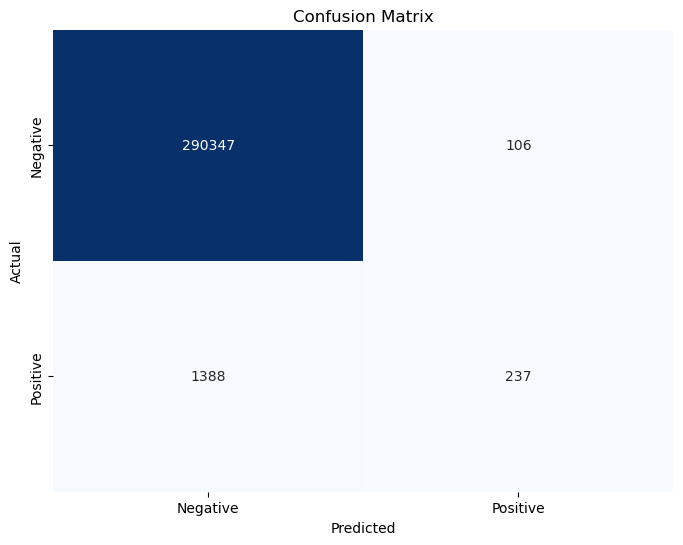

In [123]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

tp = cm[0, 0]
tn = cm[1, 1]
fp = cm[0, 1]
fn = cm[1, 0]

# Displaying the Confusion Matrix if specified
if confusion_matrix:
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        xticklabels=["Negative", "Positive"],
        yticklabels=["Negative", "Positive"],
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

Tuned_Tomek_Logit_Recall = recall_score(y_test, y_pred)
Tuned_Tomek_Logit_precision = precision_score(y_test, y_pred)
Tuned_Tomek_Logit_f1 = f1_score(y_test, y_pred)
Tuned_Tomek_Logit_accuracy = accuracy_score(y_test, y_pred)


In [124]:
ndf = [(Tuned_Tomek_Logit_Recall, Tuned_Tomek_Logit_precision, Tuned_Tomek_Logit_f1, Tuned_Tomek_Logit_accuracy)]

Tuned_Tomek_Logit_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
Tuned_Tomek_Logit_score.insert(0, 'Logistic Regression combined with', 'Tomek & Hyperparameter Tuning')
Tuned_Tomek_Logit_score

,Logistic Regression combined with,Recall,Precision,F1 Score,Accuracy
0,Tomek & Hyperparameter Tuning,0.145846,0.690962,0.240854,0.994885


## AUC-ROC Curve

In [125]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for Tomek: {ROCAUCscore:.4f}")

AUC-ROC Curve for Tomek: 0.5727


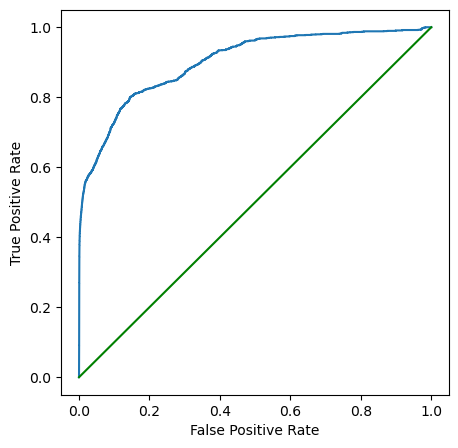

In [126]:
y_proba = best_tomek_logit.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])

## Precision-Recall Curve (PR curve)

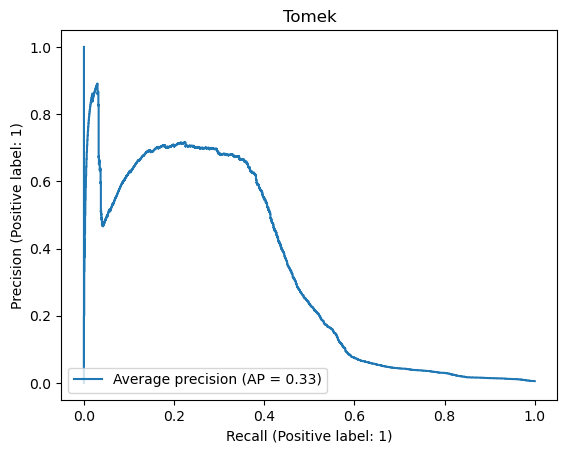

In [127]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    best_tomek_logit, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Tomek")

In [128]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    290453
           1       0.69      0.15      0.24      1625

    accuracy                           0.99    292078
   macro avg       0.84      0.57      0.62    292078
weighted avg       0.99      0.99      0.99    292078

